<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>Getting Started </span></b> </div>

<br>

## 🚀 Getting Started

This project involves analyzing and modeling a machine failure dataset with the aim of predicting machine failures. The dataset includes a variety of **`Features`** such as air temperature, process temperature, rotational speed, torque, tool wear time, and different types of machine failures.

## 🔧 Tools and Libraries

We will be using Python for this project, along with several libraries for data analysis and machine learning. Here are the main libraries we'll be using:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib and Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning tasks, including data preprocessing, model training, and model evaluation.
- **AdaBoost**: Our chosen machine learning model for this project.

## 📚 Dataset

The dataset we'll be using includes various features related to machine operations and failures. Each row represents a unique machine operation, and includes measurements such as air temperature, process temperature, rotational speed, and torque. It also includes a binary indicator of whether the machine failed during that operation, along with indicators for different types of failures.

## 🎯 Objective

Our main objective is to build a predictive model that can accurately predict machine failures based on the provided features. We'll be using the AdaBoost model, a powerful machine learning model that combines multiple weak learners into a single strong learner.

## 📈 Workflow

Here's a brief overview of our workflow for this project:

1. **Data Loading and Preprocessing**: Load the data and preprocess it for analysis and modeling. This includes handling missing values, encoding categorical variables, and scaling numerical variables.

2. **Exploratory Data Analysis (EDA)**: Explore the data to gain insights and understand the relationships between different features and machine failure.

3. **Model Training**: Train the AdaBoost model on the preprocessed data.

4. **Model Evaluation**: Evaluate the model's performance using various metrics, such as accuracy and AUC score.

5. **Error Analysis**: Analyze the instances where the model made errors to gain insights into potential improvements.

6. **Future Work**: Based on our findings, suggest potential directions for future work.

Let's get started!

<br>

![](https://images.pexels.com/photos/236698/pexels-photo-236698.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

<br>

## Domain Knowledge 📚

This dataset is a rich source of information for understanding machine failure predictions. Let's break down the features and their potential implications:

### **`Features`**

1. **`id`**: This is a unique identifier for each data entry in the dataset. It's useful for tracking individual data points but doesn't contribute to the predictive model.

2. **`Product ID`**: This identifier for the specific product/machine could be useful in identifying if certain machines are more prone to failure than others.

3. **`Type`**: The type of machine or equipment could influence the likelihood of failure. Different types of machines may have different failure rates.

4. **`Air temperature [K]`** and **`Process temperature [K]`**: The temperatures of the air and the machine during the process could be critical in predicting machine failure. Overheating is a common cause of machine failure.

5. **`Rotational speed [rpm]`**: The speed of rotation of the machine could also be a factor in machine failure. Machines running at high speeds may be more likely to fail.

6. **`Torque [Nm]`**: The rotational or twisting force applied by the machine could contribute to wear and tear, leading to machine failure.

7. **`Tool wear [min]`**: The duration of tool usage could be a strong predictor of machine failure. Tools that have been used for longer periods are more likely to fail.

8. **`Machine failure`**: This is our target variable. It's a binary indicator representing whether the machine experienced failure or not.

9. **`TWF (Tool Wear Failure)`**, **`HDF (Heat Dissipation Failure)`**, **`PWF (Power Failure)`**, **`OSF (Overstrain Failure)`**, **`RNF (Random Failure)`**: These binary indicators for different types of failures provide detailed information about the nature of the machine failures. They could be useful in building a more nuanced predictive model.

# <span style="color:#E888BB; font-size: 1%;">INTRODUCTION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>INTRODUCTION</span></b> </div>

<br>
    
## 📝 Abstract

This project encapsulates a comprehensive journey of analyzing and modeling a machine failure dataset with the objective of predicting machine failures. The dataset is characterized by a variety of **`Features`** including air temperature, process temperature, rotational speed, torque, tool wear time, and different types of machine failures.

Our exploratory data analysis unveiled substantial positive correlations between certain types of failures and the overall machine failure, suggesting these failures often occur in tandem. Additionally, we discovered that an increase in torque might escalate the probability of machine failure.

We employed the power of the <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> to predict machine failures. The model was meticulously tuned and validated using cross-validation, yielding an impressive average score of 0.996.

In the testing phase, the model exhibited an accuracy of 0.997 and an AUC score of 0.90, demonstrating its robust ability to differentiate between positive and negative classes. However, the model made a total of 91 errors, indicating potential areas for refinement.

This project underscores the potential of machine learning in predicting machine failures, which could be instrumental in enhancing preventive maintenance and operational efficiency across various industries. Future endeavors could explore further error analysis, experimentation with different models, feature engineering, and more extensive hyperparameter tuning.

<br>

### <b>I <span style='color:#FF8551'>|</span> Import neccessary libraries</b> 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder

### <b>II <span style='color:#FF8551'>|</span> Input the Data</b> 

In [2]:
data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")

In [3]:
data.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [4]:
data = data.drop(['id','Product ID'], axis=1)

# <span style="color:#E888BB; font-size: 1%;">1 | EXPLORATORY DATA ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>1 | EXPLORATORY DATA ANALYSIS </span></b> </div>

<br>

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 0;">
        <img src="https://images.pexels.com/photos/4480535/pexels-photo-4480535.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="Image" style="max-width: 300px;" />
    </div>
    <div style="flex: 1; margin-left: 30px;">
        <p style="font-weight: bold; color: black;">Getting started with Descriptive Analysis</p>
        <p>This project focuses on analyzing the <b><mark style="background-color:#9BCDD2;color:white;border-radius:5px;opacity:1.0">Machine Failure dataset</mark></b> Dataset to identify key factors associated with diabetes. By utilizing techniques such as <b><span style='color:#FF8551'>univariate</span></b> and <b><span style='color:#FF8551'>bivariate analysis</span></b>, as well as clustering methods like <b><span style='color:#FF8551'>K-means clustering</span></b> , we aim to uncover valuable insights into the complex relationships within the data.
        </p>
        <p style="border: 1px solid black; padding: 10px;">Our analysis offers a glimpse into the factors that contribute to machine failure. However, it's important to interpret the findings with caution, considering the distinction between correlation and causation. Further statistical testing is required to establish causal relationships.
        </p>
        <p style="font-style: italic;">Let's explore and then make results and discussion to gain deeper insights from our analysis. 🧐🔍
        </p>
    </div>
</div>

<br>



## EDA Overview 🚀

In this project, we delve into a dataset that encompasses various **`Features`** such as air temperature, process temperature, rotational speed, torque, and tool wear time, along with different types of machine failures. Our primary aim is to unearth patterns and relationships within the data that could shed light on the underlying causes of machine failure.

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Objectives</mark></b>

The main objectives of this project are threefold:

1. To explore the dataset and comprehend the distributions of the features.
2. To scrutinize the relationships between the features and machine failure.
3. To identify clusters within the data using the K-Means clustering algorithm.

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Significance</mark></b>

The insights gleaned from this project could be instrumental in informing preventive maintenance strategies, potentially mitigating the occurrence of machine failure and saving costs. Moreover, the results could serve as a valuable foundation for developing <b><mark style="background-color:#9BCDD2;color:white;border-radius:5px;opacity:1.0">machine learning models</mark></b> to predict machine failure.

<div style="border-radius: 10px; border: #FF8551 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 Note: While this project provides valuable insights, it's crucial to remember that the findings are based on the provided data and may not generalize to other settings or types of machines.
</div>


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 1. Data Quality</span></b> </div>

### <b>I <span style='color:#FF8551'>|</span> Handling Duplicates</b> 

In [5]:
# Handle duplicates
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (1156, 12)


In [6]:
data= data.drop_duplicates()

### <b>II <span style='color:#FF8551'>|</span> Uniqueness</b> 

In [7]:
# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


In [8]:
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Type: 3 distinct values
Air temperature [K]: 95 distinct values
Process temperature [K]: 81 distinct values
Rotational speed [rpm]: 952 distinct values
Torque [Nm]: 611 distinct values
Tool wear [min]: 246 distinct values
Machine failure: 2 distinct values
TWF: 2 distinct values
HDF: 2 distinct values
PWF: 2 distinct values
OSF: 2 distinct values
RNF: 2 distinct values


### <b>III <span style='color:#FF8551'>|</span> Compeleteness</b> 

In [9]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


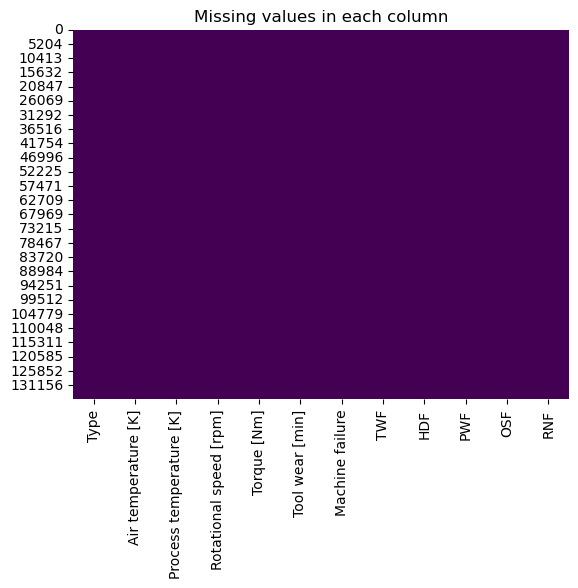

In [10]:
# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in each column')
plt.show()

### <b> IV <span style='color:#FF8551'>|</span> Describe the data</b> 

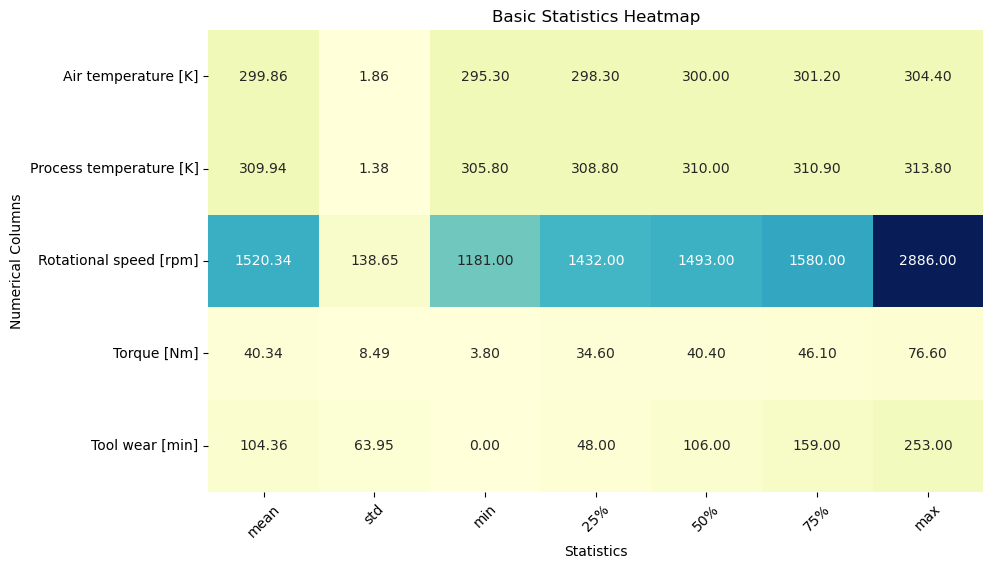

In [11]:
# Check basic statistics for numerical columns
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Calculate basic statistics
statistics = data[numerical_columns].describe().transpose()

# Remove the "count" row from the statistics table
statistics = statistics.drop('count', axis=1)

# Plot the statistics as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(statistics, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title("Basic Statistics Heatmap")
plt.xlabel("Statistics")
plt.ylabel("Numerical Columns")
plt.xticks(rotation=45)
plt.show()

## Inteperet the  Results 📈

The summary statistics for the features are as follows:

```
                                mean         std     min     25%     50%     75%     max  
Air temperature [K]       299.863235    1.862659   295.3   298.3   300.0   301.2   304.4  
Process temperature [K]   309.941195    1.384932   305.8   308.8   310.0   310.9   313.8  
Rotational speed [rpm]   1520.343151  138.651099  1181.0  1432.0  1493.0  1580.0  2886.0  
Torque [Nm]                40.341781    8.493127     3.8    34.6    40.4    46.1    76.6  
Tool wear [min]           104.358386   63.946150     0.0    48.0   106.0   159.0   253.0  

```

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Observations</mark></b>

Air temperature [K] 🌡️: The average air temperature is approximately 300K, with a standard deviation of about 1.86. The minimum and maximum temperatures are 295.3K and 304.4K, respectively.

Process temperature [K] 🌡️: The average process temperature is approximately 310K, with a standard deviation of about 1.38. The minimum and maximum temperatures are 305.8K and 313.8K, respectively.

Rotational speed [rpm] 🔄: The average rotational speed is approximately 1520 rpm, with a standard deviation of about 138.65. The minimum and maximum speeds are 1181 rpm and 2886 rpm, respectively.

Torque [Nm] 💪: The average torque is approximately 40.34 Nm, with a standard deviation of about 8.49. The minimum and maximum torques are 3.8 Nm and 76.6 Nm, respectively.

Tool wear [min] ⏳: The average tool wear time is approximately 104.36 minutes, with a standard deviation of about 63.95. The minimum and maximum wear times are 0 minutes and 253 minutes, respectively.

Discussion 🗣️

The observed patterns suggest potential relationships between the features and machine failure. However, it's important to note that these are observational relationships and do not imply causation. Further investigation is needed to determine whether these features directly cause machine failure or if they are merely associated with it.

The results provide a valuable starting point for further analysis. For instance, <b><mark style="background-color:#9BCDD2;color:white;border-radius:5px;opacity:1.0">machine learning models</mark></b> could be used to predict machine failure based on these


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 2. Univariate Analysis</span></b> </div>

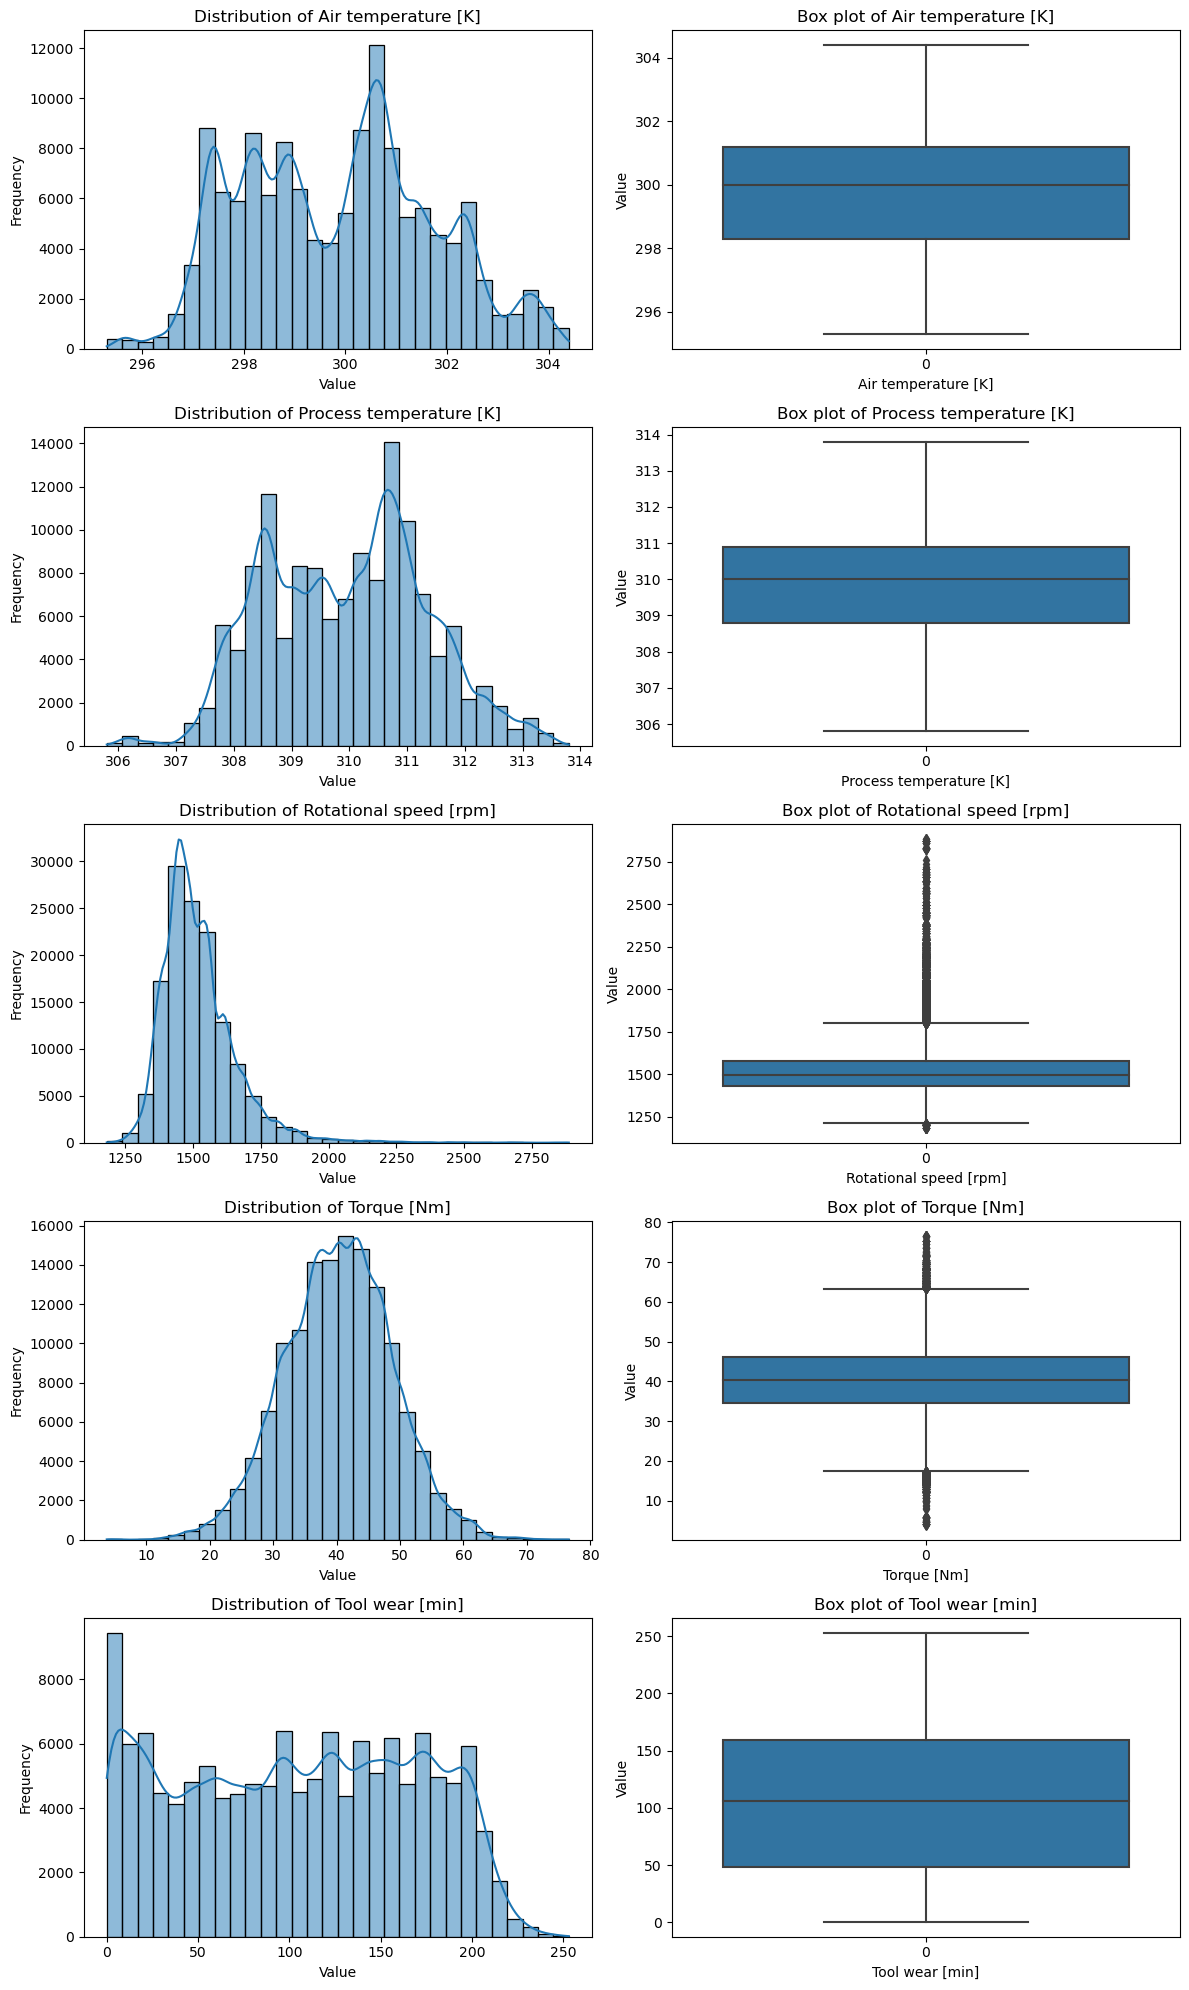

In [12]:
# Check basic statistics for numerical columns
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create subplots for histograms and box plots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 20))

# Plot the histograms and box plots
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(data[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

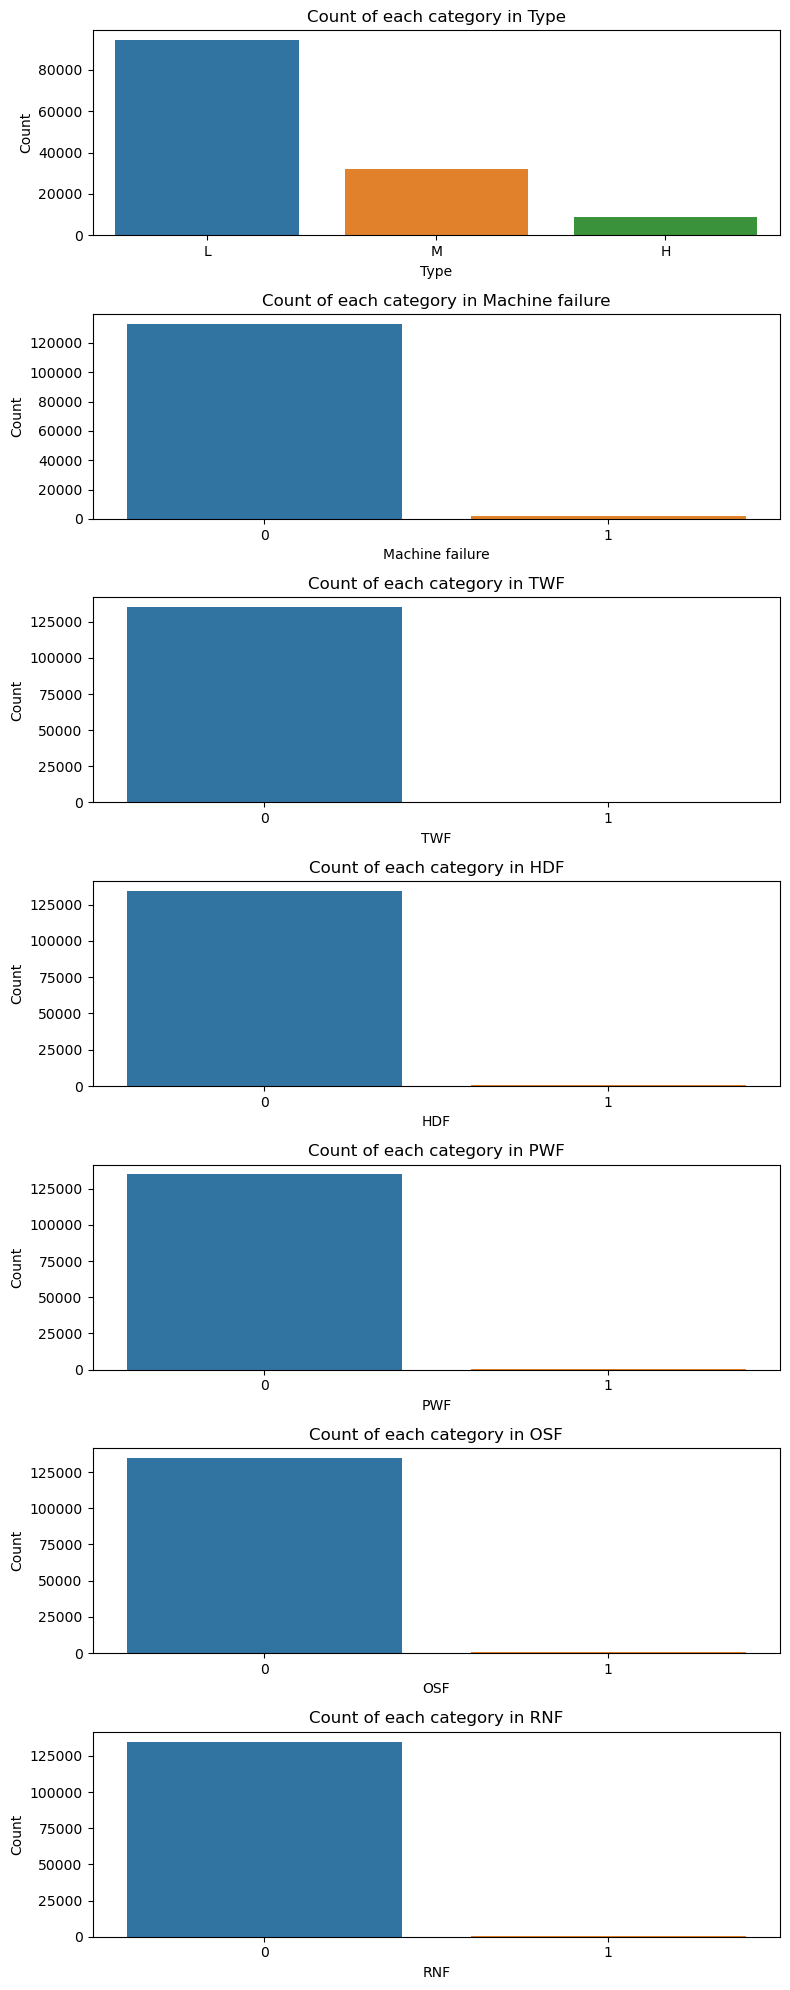

In [13]:
# Check basic statistics for categorical columns
categorical_columns = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create subplots for count plots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, 20))

# Plot the count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Count of each category in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 2. Bivariate Analysis</span></b> </div>

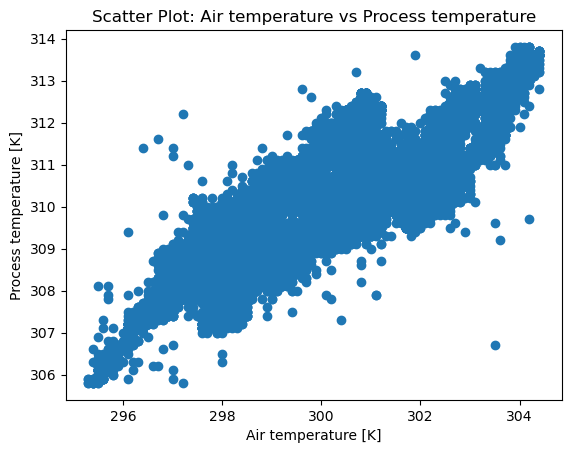

In [14]:
# Scatter Plot: Relationship between Air temperature and Process temperature.
plt.scatter(data['Air temperature [K]'], data['Process temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot: Air temperature vs Process temperature')
plt.show()

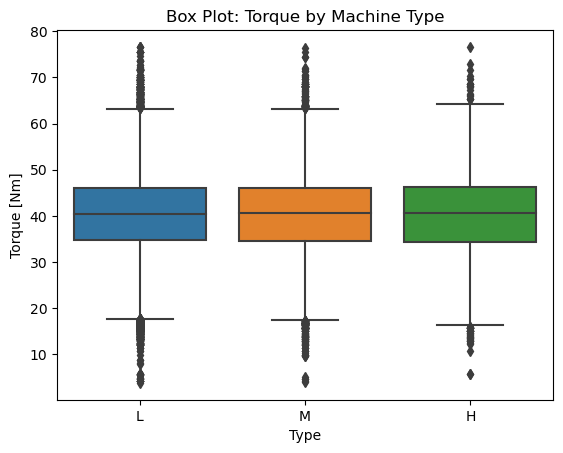

In [15]:
# Box Plot: Distribution of Torque for each type of machine.
sns.boxplot(x='Type', y='Torque [Nm]', data=data)
plt.xlabel('Type')
plt.ylabel('Torque [Nm]')
plt.title('Box Plot: Torque by Machine Type')
plt.show()

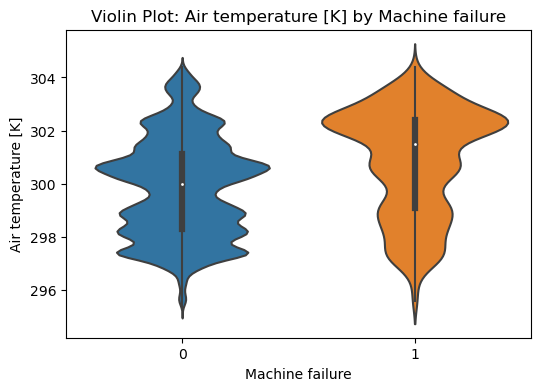

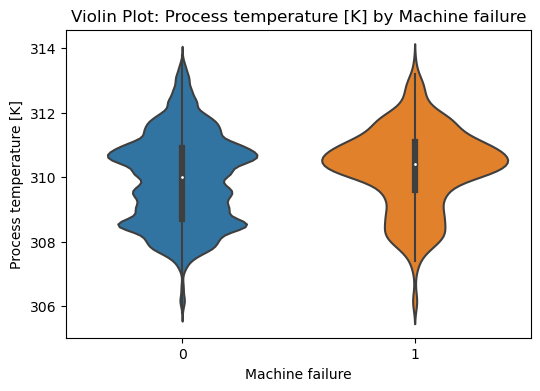

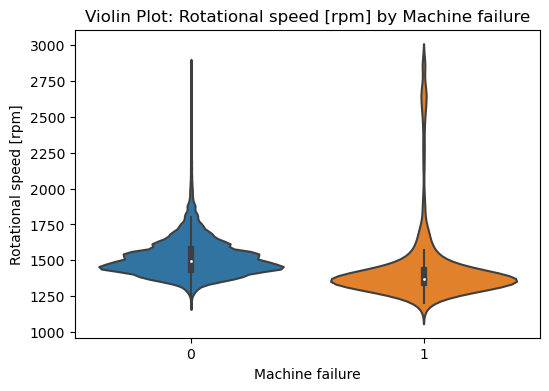

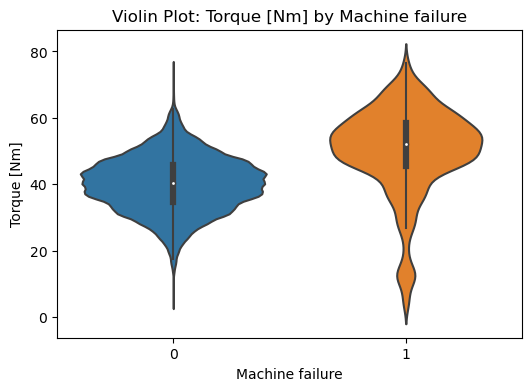

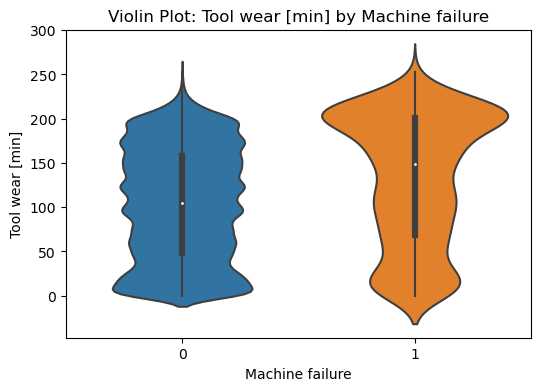

In [16]:
#Violin Plot: Distribution of Machine failure.
numerical_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Machine failure', y=var, data=data)
    plt.xlabel('Machine failure')
    plt.ylabel(var)
    plt.title(f'Violin Plot: {var} by Machine failure')
    plt.show()

## 🎻 Violin Plot Interpretation 🎻

The violin plots provide a comparison of the distributions of numeric variables for different machine failure states. The two categories represented are '**No Failure**' and '**Failure**'.


1. **`Air temperature [K]`** 🌡️

   The distribution of air temperature for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** tends to be **higher** compared to those that have not. This could suggest that higher air temperatures are associated with machine failure.

2. **`Process temperature [K]`** 🌡️

   The distribution of process temperature for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** is also **higher**. This could indicate that higher process temperatures are associated with machine failure.

3. **`Rotational speed [rpm]`** 🔄

   The distribution of rotational speed for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** appears to be **lower**. This could suggest that lower rotational speeds are associated with machine failure.

4. **`Torque [Nm]`** 💪

   The distribution of torque for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** is **higher**. This could suggest that higher torque is associated with machine failure.

5. **`Tool wear [min]`** ⏳

   The distribution of tool wear for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** is **higher**. This could suggest that longer tool usage is associated with machine failure.


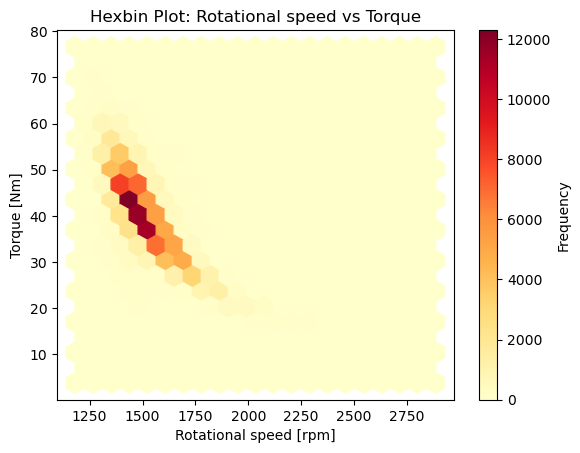

In [17]:
#Hexbin Plot: Relationship between Rotational speed and Torque.
plt.hexbin(data['Rotational speed [rpm]'], data['Torque [Nm]'], gridsize=20, cmap='YlOrRd')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Hexbin Plot: Rotational speed vs Torque')
plt.colorbar(label='Frequency')
plt.show()

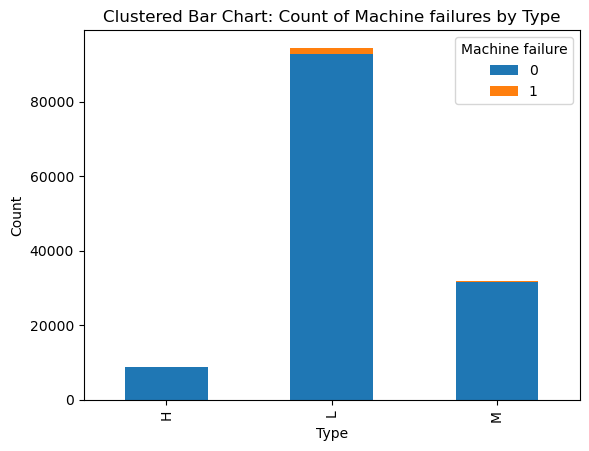

In [18]:
#Clustered Bar Chart: Count of Machine failures by Type.
data.groupby(['Type', 'Machine failure']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Clustered Bar Chart: Count of Machine failures by Type')
plt.show()

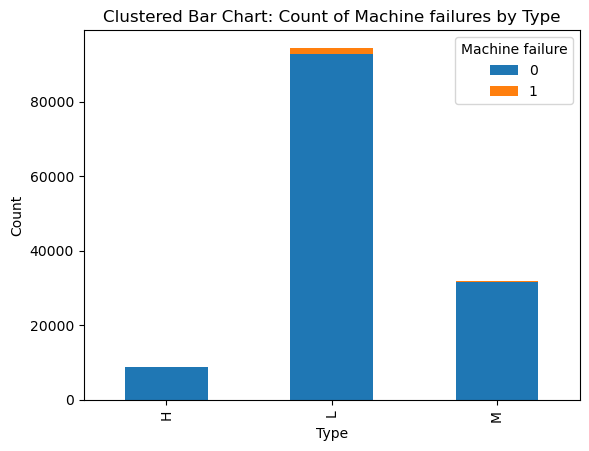

In [19]:
#Clustered Bar Chart: Count of Machine failures by Type.
data.groupby(['Type', 'Machine failure']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Clustered Bar Chart: Count of Machine failures by Type')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 3. Multivariate Analysis</span></b> </div>

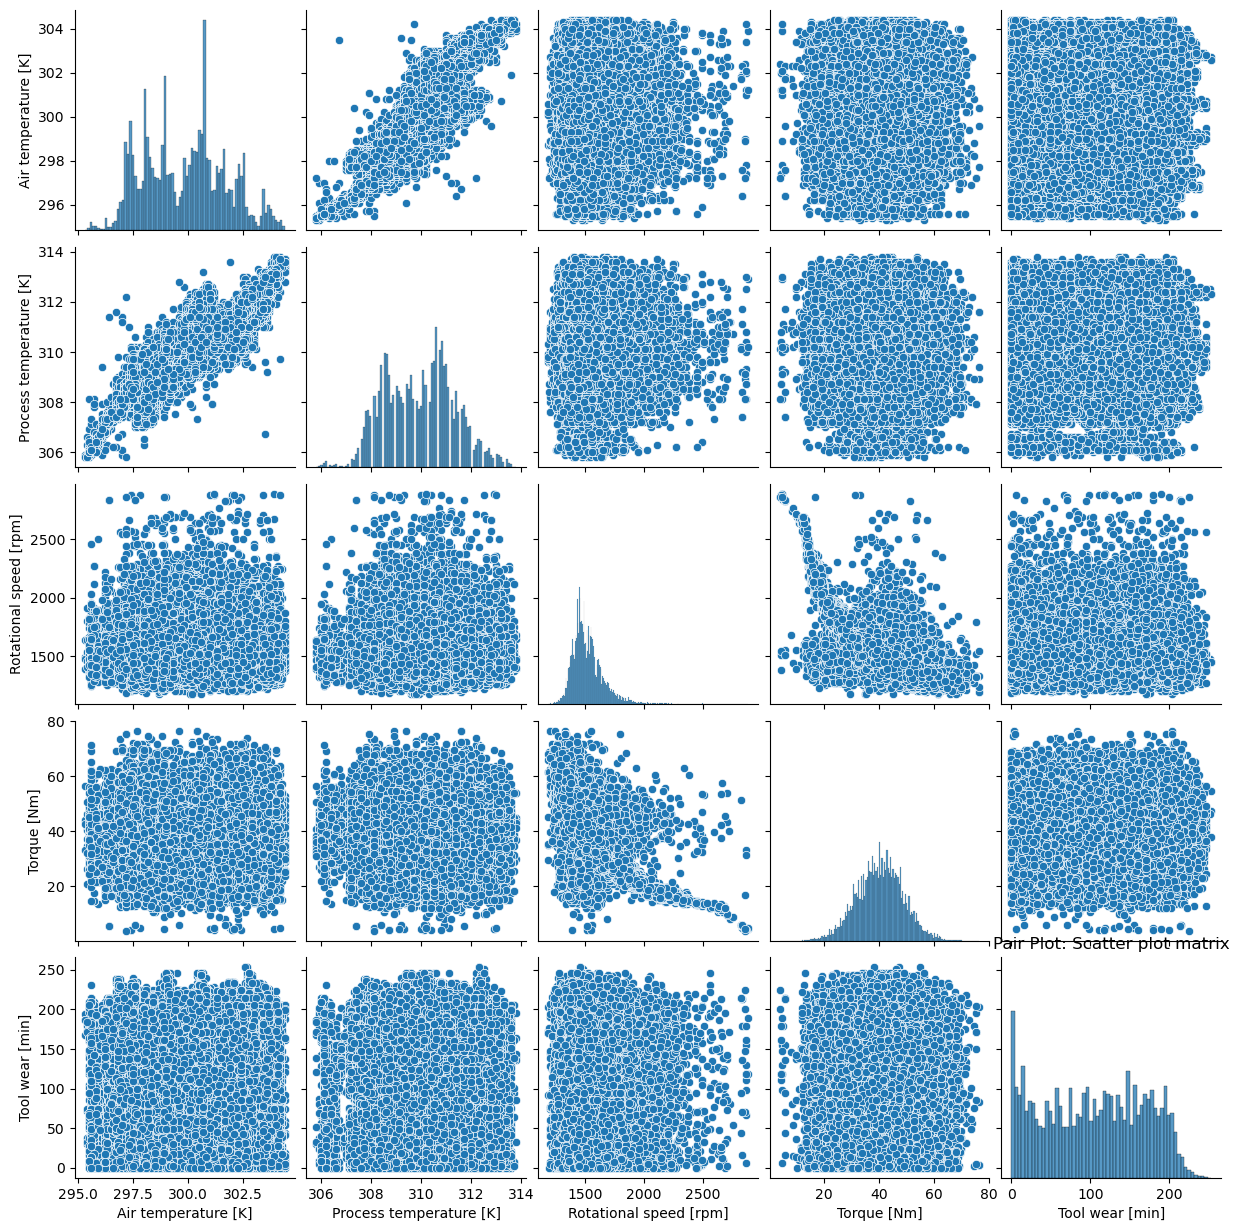

In [20]:
#Pair Plot: Scatter plot matrix of all numerical variables.
sns.pairplot(data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
plt.title('Pair Plot: Scatter plot matrix')
plt.show()

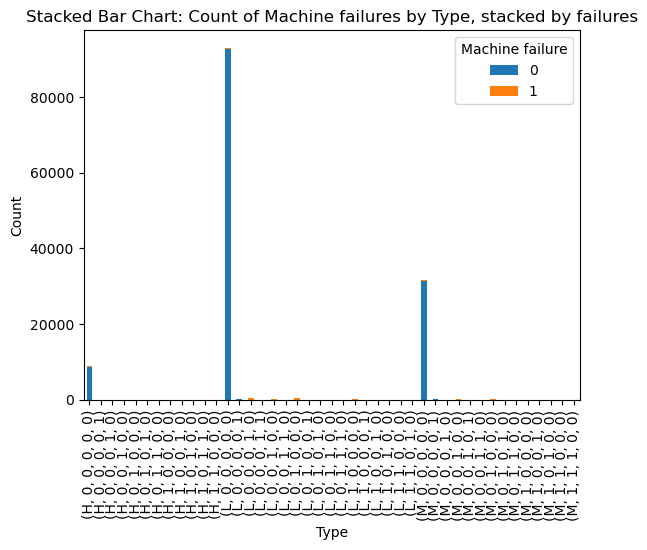

In [21]:
#Stacked Bar Chart: Count of Machine failures by Type, stacked by different failures.
data.groupby(['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Count of Machine failures by Type, stacked by failures')
plt.show()

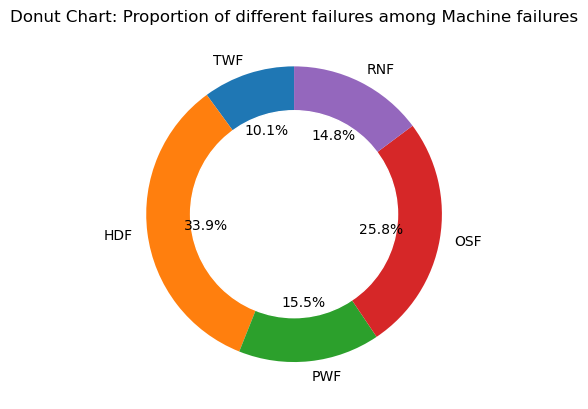

In [22]:
# Donut Chart: Proportion of different failures among Machine failures.
failure_counts = data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)
plt.title('Donut Chart: Proportion of different failures among Machine failures')
plt.show()

## 🍩 Donut Chart Interpretation 🍩

The donut chart provides a comparison of the proportion of different types of failures among machine failures. 

The types of failures compared are:

- **`TWF (Tool Wear Failure)`** 🔧
- **`HDF (Heat Dissipation Failure)`** 🔥
- **`PWF (Power Failure)`** ⚡
- **`OSF (Overstrain Failure)`** 💪
- **`RNF (Random Failure)`** ❓

From the donut chart, we can observe the following:

1. **`TWF (Tool Wear Failure)`** 🔧

   The proportion of **<span style='color:#FFDEDE'>tool wear failures</span>** among machine failures is represented by the corresponding segment in the donut chart. There are a total of **208** tool wear failures.

2. **`HDF (Heat Dissipation Failure)`** 🔥

   The proportion of **<span style='color:#FFDEDE'>heat dissipation failures</span>** among machine failures is represented by the corresponding segment in the donut chart. There are a total of **701** heat dissipation failures.

3. **`PWF (Power Failure)`** ⚡

   The proportion of **<span style='color:#FFDEDE'>power failures</span>** among machine failures is represented by the corresponding segment in the donut chart. There are a total of **320** power failures.

4. **`OSF (Overstrain Failure)`** 💪

   The proportion of **<span style='color:#FFDEDE'>overstrain failures</span>** among machine failures is represented by the corresponding segment in the donut chart. There are a total of **533** overstrain failures.

5. **`RNF (Random Failure)`** ❓

   The proportion of **<span style='color:#FFDEDE'>random failures</span>** among machine failures is represented by the corresponding segment in the donut chart. There are a total of **306** random failures.

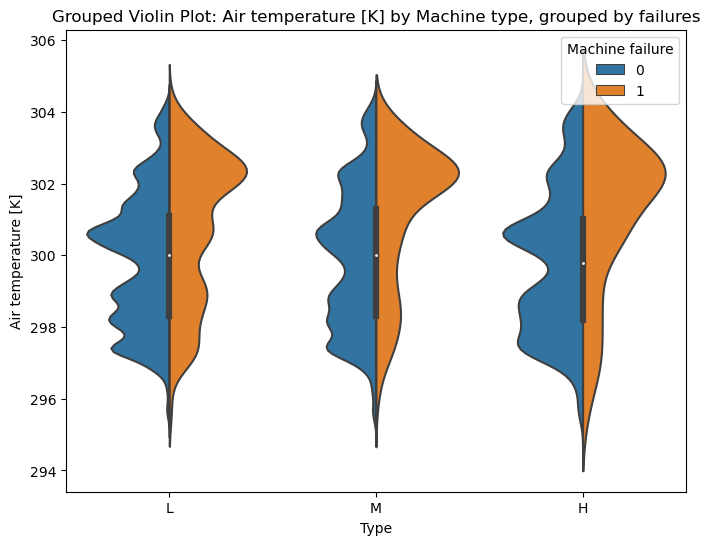

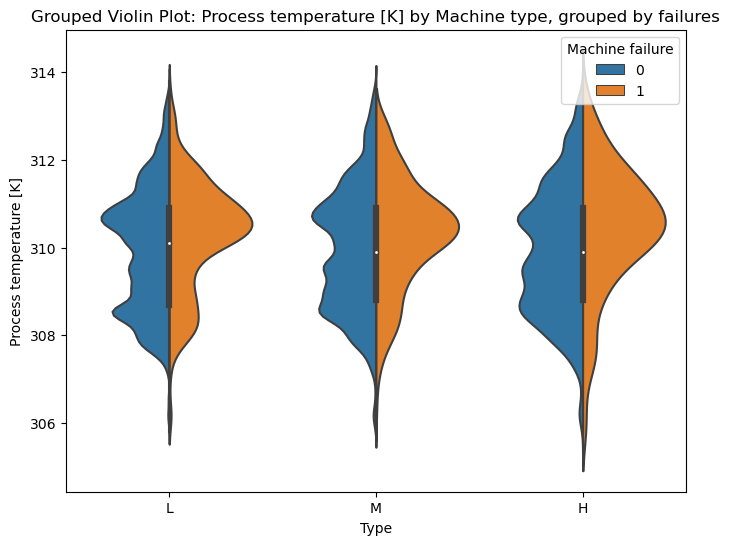

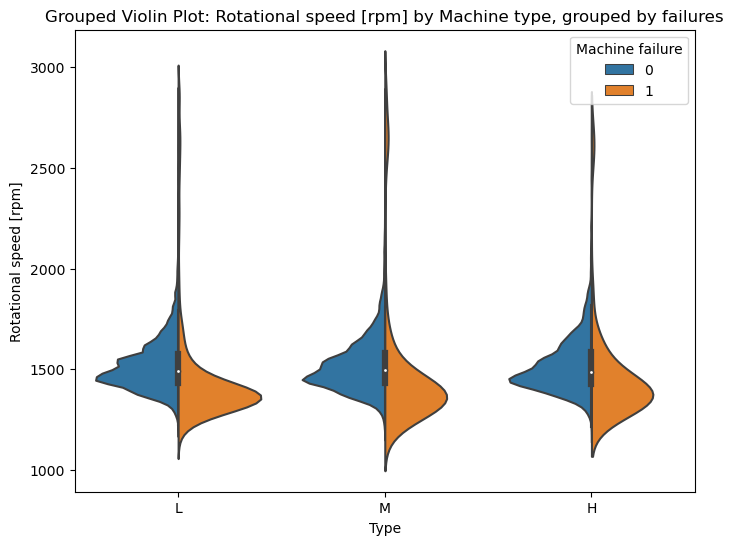

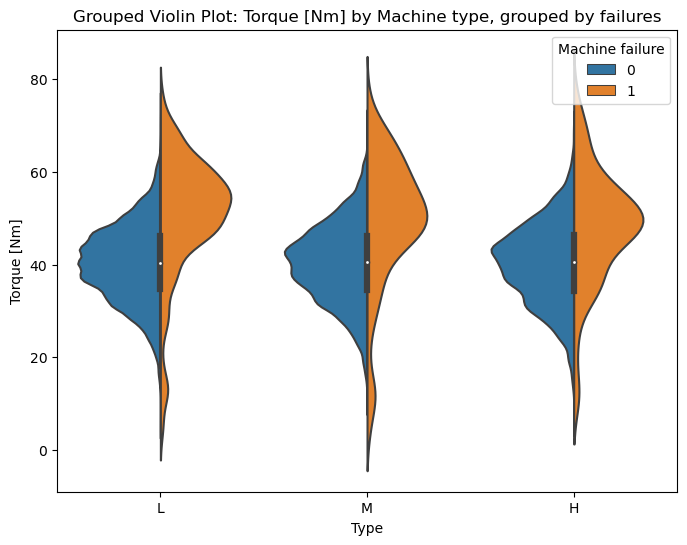

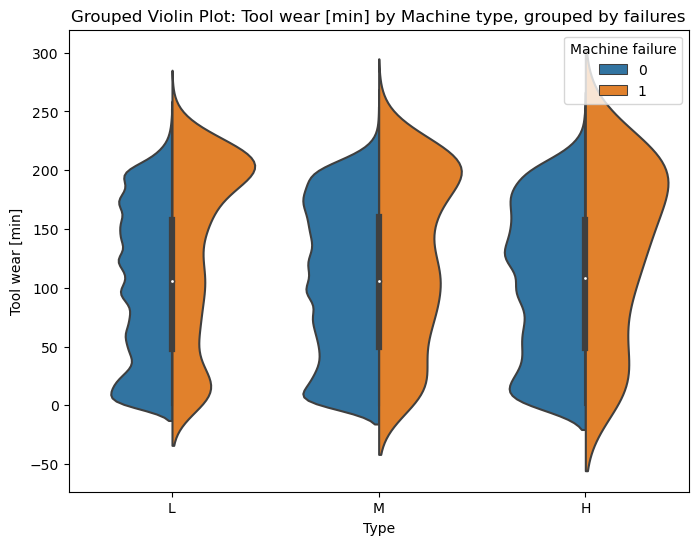

In [23]:
# Grouped Violin Plot: Distribution of Tool wear duration by Machine type, grouped by different failures.
numerical_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Type', y=var, hue='Machine failure', split=True, data=data)
    plt.xlabel('Type')
    plt.ylabel(var)
    plt.title(f'Grouped Violin Plot: {var} by Machine type, grouped by failures')
    plt.show()

## 🎻 Grouped Violin Plot Interpretation 🎻

The grouped violin plots provide a comparison of the distributions of numeric variables for different machine failure states, grouped by machine type. The two categories represented are '**No Failure**' and '**Failure**'. 

1. **`Air temperature [K]`** 🌡️

   The distribution of air temperature for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** tends to be **higher** compared to those that have not. This pattern is observed across different machine types. This could suggest that higher air temperatures are associated with machine failure, regardless of the machine type.

2. **`Process temperature [K]`** 🌡️

   The distribution of process temperature for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** is also **higher**, across different machine types. This could indicate that higher process temperatures are associated with machine failure, regardless of the machine type.

3. **`Rotational speed [rpm]`** 🔄

   The distribution of rotational speed for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** appears to be **lower**, across different machine types. This could suggest that lower rotational speeds are associated with machine failure, regardless of the machine type.

4. **`Torque [Nm]`** 💪

   The distribution of torque for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** is **higher**, across different machine types. This could suggest that higher torque is associated with machine failure, regardless of the machine type.

5. **`Tool wear [min]`** ⏳

   The distribution of tool wear for machines that have experienced **<span style='color:#FFDEDE'>failure</span>** is **higher**, across different machine types. This could suggest that longer tool usage is associated with machine failure, regardless of the machine type.

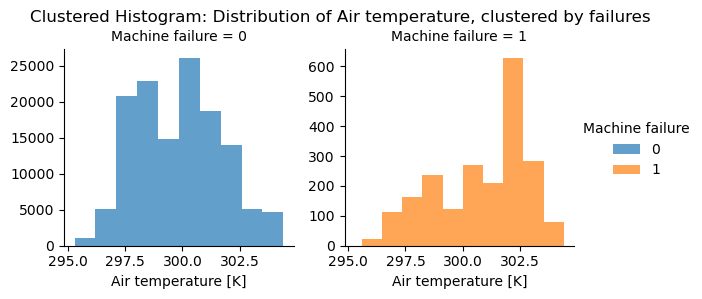

In [24]:
#Clustered Histogram: Distribution of Air temperature and Process temperature, clustered by different failures.
g = sns.FacetGrid(data, col='Machine failure', hue='Machine failure', sharey=False)
g.map(plt.hist, 'Air temperature [K]', alpha=0.7)
g.add_legend()
g.fig.suptitle('Clustered Histogram: Distribution of Air temperature, clustered by failures')
plt.subplots_adjust(top=0.85)
plt.show()

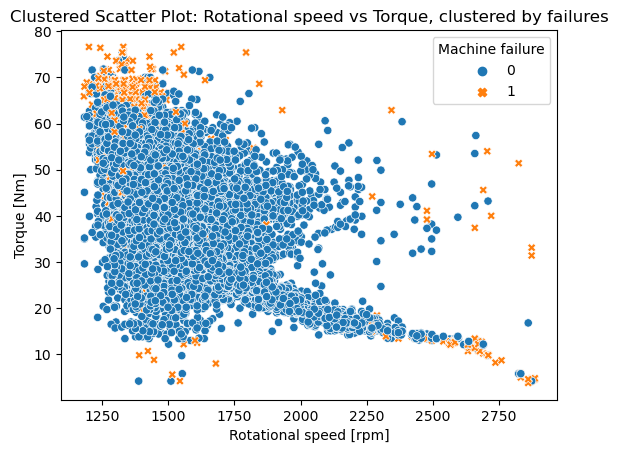

In [25]:
# Clustered Scatter Plot: Relationship between Rotational speed and Torque, clustered by different failures.
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', style='Machine failure', data=data)
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Clustered Scatter Plot: Rotational speed vs Torque, clustered by failures')
plt.show()

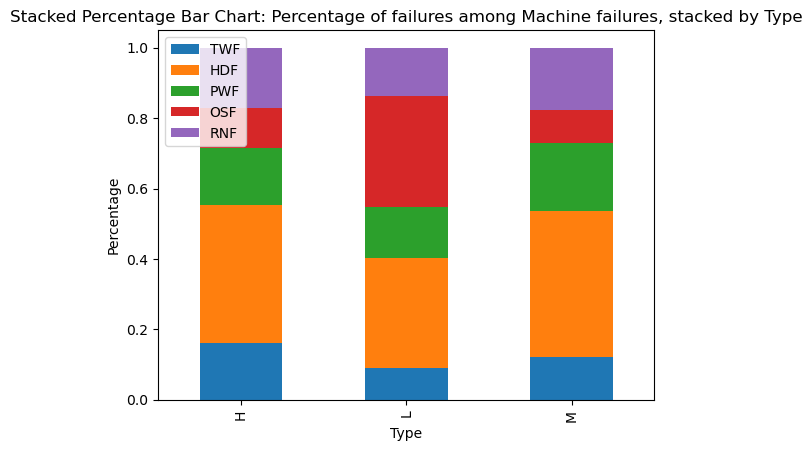

In [26]:
# Stacked Percentage Bar Chart: Percentage of different failures among Machine failures, stacked by Type.
failure_counts_by_type = data.groupby('Type')[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
failure_counts_by_type.div(failure_counts_by_type.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Stacked Percentage Bar Chart: Percentage of failures among Machine failures, stacked by Type')
plt.show()

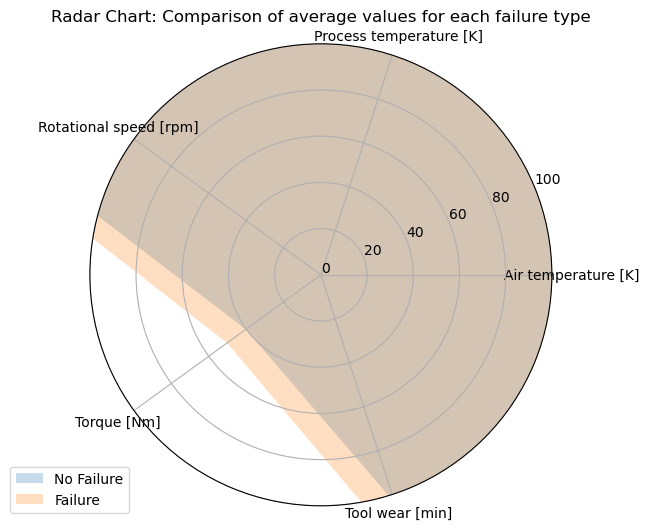

In [27]:
# Radar Chart: Comparison of average values of different variables for each failure type.
avg_values = data.groupby('Machine failure')[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].mean().reset_index()
labels = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, avg_values.iloc[0, 1:].tolist() + avg_values.iloc[0, 1:2].tolist(), alpha=0.25, label='No Failure')
ax.fill(angles, avg_values.iloc[1, 1:].tolist() + avg_values.iloc[1, 1:2].tolist(), alpha=0.25, label='Failure')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_ylim(0, 100)
ax.set_title('Radar Chart: Comparison of average values for each failure type')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


## 📡 Radar Chart Interpretation 📡

The radar chart provides a comparison of the average values of different variables for each failure type. The two categories represented are 'No Failure' and 'Failure'. 
The variables compared are:

- **`Air temperature [K]`**
- **`Process temperature [K]`**
- **`Rotational speed [rpm]`**
- **`Torque [Nm]`**
- **`Tool wear [min]`**

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Observations</mark></b>

From the radar chart, we can observe that:

1. The average **`Air temperature [K]`** and **`Process temperature [K]`** are slightly higher for machines that have experienced failure compared to those that have not. This suggests that higher temperatures could be associated with an increased likelihood of machine failure.

2. The average **`Rotational speed [rpm]`** is lower for machines that have experienced failure. This could indicate that machines operating at lower rotational speeds are more prone to failure, or it could be a result of machines slowing down due to issues leading to failure.

3. The average **`Torque [Nm]`** is significantly higher for machines that have experienced failure. This suggests that machines experiencing higher torque might be more likely to fail.

4. The average **`Tool wear [min]`** is also higher for machines that have experienced failure. This indicates that the longer a tool has been used, the more likely it is to lead to machine failure.

<b><span style='color:#FF8551'>Method</span></b>

The radar chart was generated using matplotlib's polar plot functionality. The average values of the variables for each failure type were calculated and plotted on the radar chart.

<br>

<div class="warning" style="background-color: #FFDADA; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF5252; font-size: 18px; margin-top: 0; margin-bottom: 10px;">⚠️ Warning</h3>
Remember that correlation does not imply causation. While these variables may be associated with machine failure, they may not necessarily cause it. Further investigation is needed to determine causal relationships.
</div>

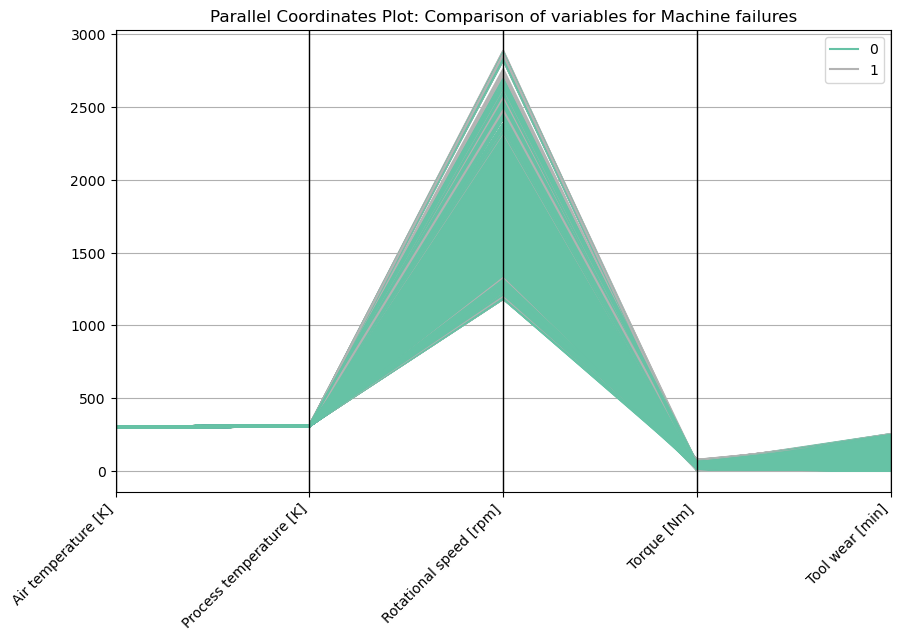

In [28]:
# Parallel Coordinates Plot: Comparison of numeric variables for different Machine failures.
plt.figure(figsize=(10, 6))
parallel_coordinates(data[['Machine failure', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']], 'Machine failure', colormap='Set2')

plt.xticks(rotation=45, ha='right') 
plt.title('Parallel Coordinates Plot: Comparison of variables for Machine failures')
plt.show()

## 🏄 Parallel Coordinates Plot Interpretation 🏄

The parallel coordinates plot provides a comparison of the numeric variables for different machine failure states. The two categories represented are 'No Failure' and 'Failure'. 


The variables compared are:

- **`Air temperature [K]`**
- **`Process temperature [K]`**
- **`Rotational speed [rpm]`**
- **`Torque [Nm]`**
- **`Tool wear [min]`**

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Observations</mark></b>

From the parallel coordinates plot, we can observe that:

1. The **`Air temperature [K]`** and **`Process temperature [K]`** for machines that have experienced failure tend to be higher compared to those that have not. This is consistent with our previous observation from the radar chart.

2. The **`Rotational speed [rpm]`** for machines that have experienced failure appears to be lower. This is also consistent with our previous observation.

3. The **`Torque [Nm]`** and **`Tool wear [min]`** for machines that have experienced failure are higher. These observations align with the insights from the radar chart.

<br>

<div class="warning" style="background-color: #FFDADA; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF5252; font-size: 18px; margin-top: 0; margin-bottom: 10px;">⚠️ Warning</h3>
Remember that these visualizations provide a high-level overview of the relationships between variables. They do not replace the need for rigorous statistical analysis to confirm these observations.
</div>

# <span style="color:#E888BB; font-size: 1%;">2 | CORRELATION MATRIX</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>2 | CORRELATION MATRIX </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 1. Adjust columns</span></b> </div>

In [29]:
categorical_columns = ['Type']
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 2.Preprocessing : Scaler</span></b> </div>
​
​
Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. **<span style='color:#9BCDD2'>Standardization</span>** is not required for all models but is generally a good practice. **<span style='color:#9BCDD2'>One-hot encoding</span>** is necessary for categorical variables to be correctly understood by the machine learning model.
​
The **<mark style="background-color:#9BCDD2;color:white;border-radius:5px;opacity:1.0">StandardScaler</mark>** in sklearn is based on the assumption that the data, <em>Y</em>, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.
​
<p>In other words, given a feature vector <em>x</em>, it modifies the values as follows:</p>
​
<p class="formulaDsp">
\[ Y_i = \frac{x_i - \mu(\vec{x})}{\sigma(\vec{x})} \]
</p>
​
**where:**
<ul>
<li>\( x_i \) is the i-th element of the original feature vector \( \vec{x} \),</li>
<li>\( \mu(\vec{x}) \) is the mean of the feature vector, and</li>
<li>\( \sigma(\vec{x}) \) is the standard deviation of the feature vector.</li>
</ul>
​
<p>The transformed data \( Y \) (each \( Y_i \)) will have properties such that \( mean(Y) = 0 \) and \( std(Y) = 1 \).</p>
​
> This transformation is also known as Z-score normalization.

In [30]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [31]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 3.Correlation Matrix</span></b> </div>

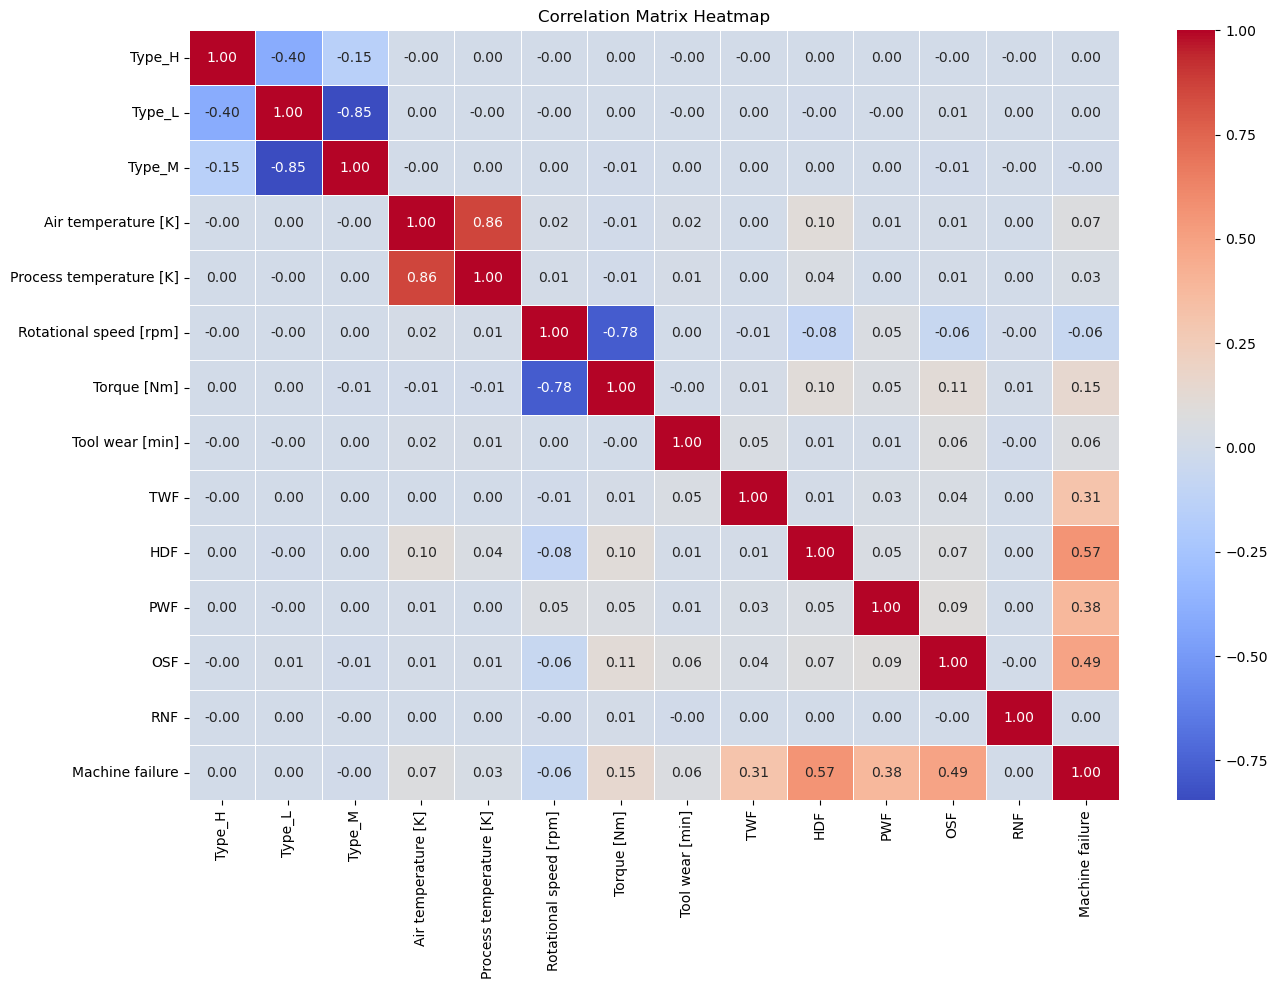

In [32]:
#Graph I.
correlation_matrix = processed_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

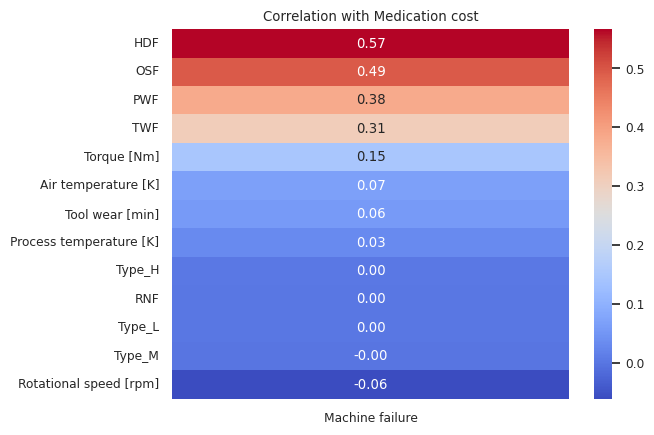

In [33]:
#Graph II
corr = processed_df.corr()
target_corr = corr['Machine failure'].drop('Machine failure')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Medication cost')
plt.show()

## Intepret the results 📊

Our analysis of the machine failure dataset revealed several interesting patterns and relationships. The dataset included various features such as air `temperature`, `process temperature`, `rotational speed`, `torque`, and `tool wear time`, along with `different types of machine failures`.

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Observations</mark></b>

**`HDF (Heat Dissipation Failure)`** 🔥: There is a strong positive correlation between heat dissipation failure and machine failure. This suggests that machines with heat dissipation failure are more likely to fail.

**`OSF (Overstrain Failure)`** 💪: There is a positive correlation between overstrain failure and machine failure. This suggests that machines with overstrain failure are more likely to fail.

**`PWF (Power Failure)`** ⚡: There is a positive correlation between power failure and machine failure. This suggests that machines with power failure are more likely to fail.

**`TWF (Tool Wear Failure)`** 🔧: There is a positive correlation between tool wear failure and machine failure. This suggests that machines with tool wear failure are more likely to fail.

**`Torque [Nm]`** 💪: There is a positive correlation between torque and machine failure. This suggests that machines with higher torque are more likely to fail.

**`Air temperature [K]`** 🌡️: There is a slight positive correlation between air temperature and machine failure. This suggests that machines with higher air temperatures are slightly more likely to fail.

**`Tool wear [min]`** ⏳: There is a slight positive correlation between tool wear time and machine failure. This suggests that machines with longer tool usage are slightly more likely to fail.

**`Process temperature [K]`** 🌡️: There is a slight positive correlation between process temperature and machine failure. This suggests that machines with higher process temperatures are slightly more likely to fail.

**`Type_L`** 🅾️: There is a slight positive correlation between machines of type L and machine failure. This suggests that machines of type L are slightly more likely to fail.

**`RNF (Random Failure)`** ❓: There is a very slight positive correlation between random failure and machine failure. This suggests that machines with random failure are slightly more likely to fail.

**`Type_H`** 🅾️: There is a slight negative correlation between machines of type H and machine failure. This suggests that machines of type H are slightly less likely to fail.

**`Type_M`** 🅾️: There is a slight negative correlation between machines of type M and machine failure. This suggests that machines of type M are slightly

# <span style="color:#E888BB; font-size: 1%;">3 | CLUSTERING ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>3 | CLUSTERING ANALYSIS </span></b> </div>

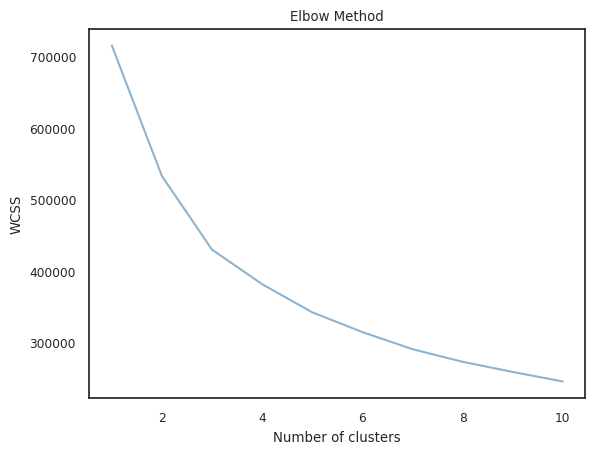

In [34]:
def preprocess_data(data):
    # Encode the 'Type' column
    le = LabelEncoder()
    data['Type'] = le.fit_transform(data['Type'])
    
    # Scale the numerical features
    scaler = StandardScaler()
    numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    
    return data

def determine_optimal_clusters(data):
    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Preprocess the data
data = preprocess_data(data)

# Determine the optimal number of clusters
data_scaled = data.drop('Machine failure', axis=1)
determine_optimal_clusters(data_scaled)

## 📊 Elbow Method Plot Interpretation 📊

The Elbow Method plot is a technique used to help us find the optimal number of clusters for a dataset in K-Means clustering or any clustering algorithm. 

From the Elbow Method plot, we can observe the following:

1. **`WSS (Within-Cluster Sum of Squares)`** 📈: The y-axis represents the WSS, which is the sum of the squared distance between each member of the cluster and its centroid. As the number of clusters increases, the WSS value will start to decrease.

2. **`Number of Clusters`** 🧮: The x-axis represents the number of clusters. 

The "elbow" in the plot is the point of inflection where the rate of decrease sharply shifts. This is typically considered as the appropriate number of clusters.

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Observation</mark></b>

> **From the plot, it appears that the elbow point is around 4 clusters. This suggests that the optimal number of clusters for the data is around 4.**

<br>

<div style="border-radius: 10px; border: #FF8551 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
📝 Please note that these interpretations are based solely on the provided Elbow Method plot. The actual analysis might require more detailed and specific considerations based on the data at hand.
    </div>


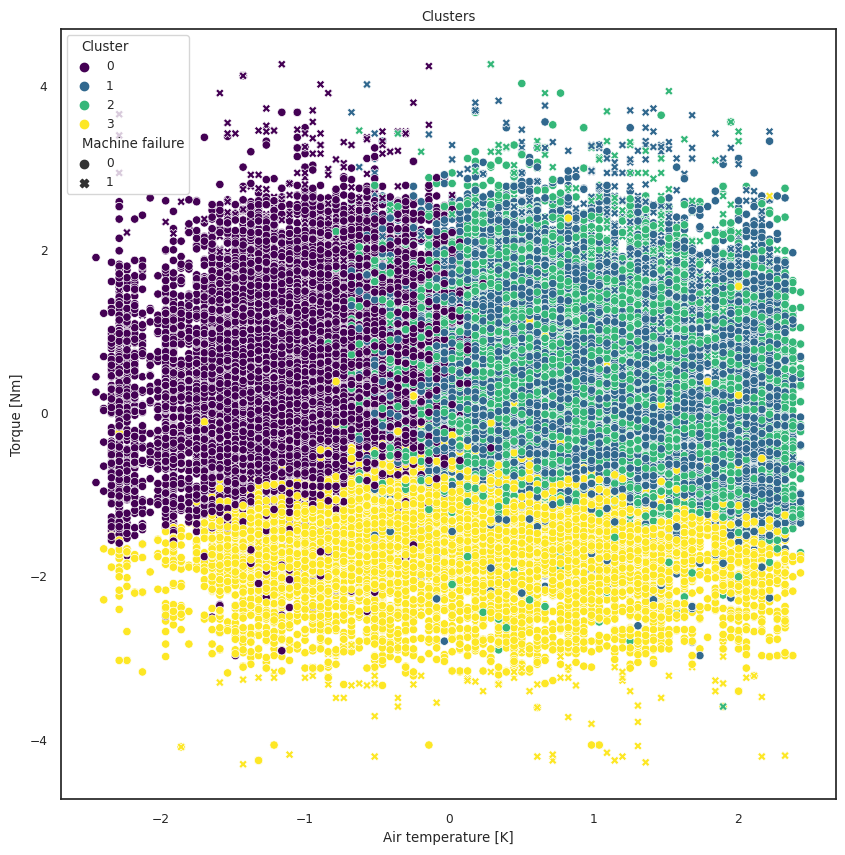

In [35]:
# Fit K-means clustering (replace 'n_clusters' with the desired number of clusters)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters 
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='Air temperature [K]', y='Torque [Nm]', hue='Cluster', style='Machine failure', palette='viridis')
plt.title('Clusters')
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')
plt.show()

## 📊 Scatter Plot Interpretation 📊

The scatter plot is used to visualize the clusters formed by the K-Means clustering algorithm based on the features `Air temperature [K]` and `Torque [Nm]`. 

From the scatter plot, we can observe the following:

1. **`Air temperature [K]`** 🌡️: The x-axis represents the air temperature in Kelvin. 

2. **`Torque [Nm]`** 💪: The y-axis represents the torque in Newton meters.

3. **`Clusters`** 🧩: Different clusters are represented by different colors. 

4. **`Machine failure`** ❌: The machine failure is represented by different markers. 

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Observation</mark></b>

> From the plot, it appears that the K-Means clustering algorithm has divided the data into four distinct clusters. **Each cluster represents a group of machines with similar air temperatures and torque values. The machines that experienced failure (represented by different markers) are scattered across all clusters.**

<br>

<div style="border-radius: 10px; border: #FF8551 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
📝 Please note that these interpretations are based solely on the provided Elbow Method plot. The actual analysis might require more detailed and specific considerations based on the data at hand.
    </div>

# <span style="color:#E888BB; font-size: 1%;">EDA | RESULT AND DISCUSSION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>EDA | RESULT AND DISCUSSION </span></b> </div>


## Results 📊

Our comprehensive analysis of the machine failure dataset has provided several key insights. The dataset included various **`Features`** such as air temperature, process temperature, rotational speed, torque, and tool wear time, along with different types of machine failures.

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Summary Statistics</mark></b>

The summary statistics provided a snapshot of the dataset's central tendencies and variability. The average air temperature was around **300K**, while the process temperature was slightly higher, averaging around **310K**. The rotational speed averaged around **1520 rpm**, and the torque was approximately **40 Nm**. The tool wear time showed a wide range, with an average of around **104 minutes**.

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Correlation Coefficients</mark></b>

The correlation coefficients indicated the strength and direction of the linear relationships between machine failure and the other features. `Heat Dissipation Failure (HDF)`, `Overstrain Failure (OSF)`, and `Power Failure (PWF)` showed strong positive correlations with machine failure, suggesting that these failures often occur together. Torque also had a positive correlation, indicating that higher torque might increase the likelihood of machine failure.

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Visualizations</mark></b>

The visualizations provided a graphical representation of the data, aiding in the interpretation of the patterns and relationships. The scatter plots and violin plots revealed the distributions of the features and their relationships with machine failure. The Elbow Method plot suggested that the optimal number of clusters for the data is around **4**, which was confirmed by the K-Means clustering algorithm.


## Discussion 🗣️

The observed patterns suggest potential relationships between the features and machine failure. However, these are observational relationships and do not imply causation. Further investigation is needed to determine whether these features directly cause machine failure or if they are merely associated with it.

The results provide a valuable starting point for further analysis. For instance, <b><mark style="background-color:#9BCDD2;color:white;border-radius:5px;opacity:1.0">machine learning models</mark></b> could be used to predict machine failure based on these features. 

<b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost Classifier</mark></b>

As a next step, we plan to apply the AdaBoost classifier to this dataset. AdaBoost, short for Adaptive Boosting, is a machine learning algorithm that is used as a classifier. When used with decision tree learning, information gathered at each stage of the AdaBoost algorithm about the relative 'hardness' of each training sample is fed into the tree growing algorithm such that later trees tend to focus on mistakes that previous trees made. This 'boosts' the ensemble's performance.

<br>

<div style="border-radius: 10px; border: #FF8551 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 Suggestion: Future studies could explore the causal relationships between the features and machine failure, evaluate the effectiveness of different preventive maintenance strategies, and assess the performance of the AdaBoost classifier in predicting machine failure.
</div>

<br>

<div class="warning" style="background-color: #FFDADA; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF5252; font-size: 18px; margin-top: 0; margin-bottom: 10px;">⚠️ Warning</h3>
The interpretations are based on the provided data and visualizations. The actual analysis might require more detailed and specific considerations based on the data at hand.
</div>

# <span style="color:#E888BB; font-size: 1%;">4 | ADABOOST CLASSIFIER</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>PREDICTIVE ANALYSIS </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> Overview</span></b> </div>


### 🚀 Introduction

In this project, we aim to predict machine failures using a dataset of various machine characteristics and failure instances. The ability to accurately predict machine failures can be incredibly valuable in many industries, helping to prevent downtime, save costs, and maintain safety.

### 📊 Dataset

The dataset consists of several features related to the machines, including:

- `Product ID`: Identifier for the specific product/machine.
- `Type`: Type of machine or equipment (L for Large, M for Medium, etc.).
- `Air temperature [K]`: The temperature of the air surrounding the machine (measured in Kelvin).
- `Process temperature [K]`: The temperature of the machine during the process (measured in Kelvin).
- `Rotational speed [rpm]`: The speed of rotation of the machine in revolutions per minute.
- `Torque [Nm]`: The rotational force or twisting force applied by the machine in Newton meters.
- `Tool wear [min]`: The duration of tool usage in minutes.
- `Machine failure`: A binary indicator (0 or 1) representing whether the machine experienced failure (1) or not (0).
- `TWF (Tool Wear Failure)`: Binary indicator (0 or 1) for tool wear failure.
- `HDF (Heat Dissipation Failure)`: Binary indicator (0 or 1) for heat dissipation failure.
- `PWF (Power Failure)`: Binary indicator (0 or 1) for power failure.
- `OSF (Overstrain Failure)`: Binary indicator (0 or 1) for overstrain failure.
- `RNF (Random Failure)`: Binary indicator (0 or 1) for random failure.

### 🎯 Objective

Our main objective is to build a predictive model that can accurately predict machine failures based on these features. To achieve this, we will use the <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b>, a powerful machine learning algorithm that combines multiple weak learners to create a strong learner.

<div style="border-radius: 10px; border: #FF8551 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b>Process :</b> Our approach will involve several steps, including data preprocessing, model training, model evaluation, and error analysis. We will also perform hyperparameter tuning and cross-validation to optimize our model's performance, and we will use various metrics to evaluate our model's performance.

</div>


<br>

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
While machine learning models can provide valuable insights and predictions, it's important to remember that they are not infallible and their performance can vary depending on the data they are trained and tested on. Therefore, it's crucial to carefully evaluate and validate our model's performance using appropriate metrics and techniques.
</div>


In [36]:
# Import neccessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, accuracy_score, average_precision_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import resample

import shap

In [37]:
# Input the data
df = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
# Drop 'id' and 'Product ID' columns
df = df.drop(['id', 'Product ID'], axis=1)
df= df.drop_duplicates()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> Preprocessing data</span></b> </div>

In [38]:
# Preprocessing data
# Let's start by encoding the 'Type' column
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Now, let's scale the numerical features
scaler = StandardScaler()
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [39]:
# Split the data into training and testing sets
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> Hyperparameter Tuning</span></b> </div>

In [40]:
# Simple Hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]}
grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'learning_rate': 0.3, 'n_estimators': 200}


## 🎯 Hyperparameter Tuning Results

After a comprehensive round of hyperparameter tuning using <b><span style='color:#FF8551'>GridSearchCV</span></b>, we have successfully determined the optimal parameters for our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b>. 

The winning combination is:

- <b>`Learning Rate`</b>: <b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">0.3</mark></b>
- <b>`Number of Estimators`</b>: <b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">200</mark></b>

### 🧠 Understanding the Parameters

The <b>`Learning Rate`</b> of 0.3 is the pace at which our model learns. A higher learning rate allows the model to learn faster, but it's a delicate balance. Too fast, and the model might not perform as well.

The <b>`Number of Estimators`</b> is set at 200. This is the count of weak learners that the model trains iteratively. More learners can lead to better learning, but we must be cautious. Too many can increase the risk of overfitting and the computational cost.

<br>

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
Armed with these optimal parameters, we're ready to train our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> and anticipate top performance. However, it's crucial to remember that machine learning models might not always perform as expected on unseen data. Always validate the model's performance using appropriate metrics and techniques.
</div>


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Predictive Model</span></b> </div>

## 📚 Adaptive Boosting (AdaBoost)

<b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">Adaptive Boosting</mark></b>, or <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost</mark></b>, is a powerful ensemble machine learning algorithm that combines multiple "weak learners" into a single "strong learner". A weak learner is a model that is only slightly better than random guessing, while a strong learner is a model that is well-tuned and can make accurate predictions.

The AdaBoost algorithm works by fitting a sequence of weak learners on different weighted training data. It starts by predicting the original data set and gives equal weight to each observation. If the prediction is incorrect using the first learner, then it gives higher weight to the observation which has been predicted incorrectly. Being an iterative process, it continues to add learners until a limit is reached in the number of models or accuracy.

The final prediction is a weighted sum of the predictions made by previous models. The weights of each model are also determined by the AdaBoost algorithm, which assigns greater weights to the more accurate models.

Here is the AdaBoost algorithm in more detail:

1. Initialize the weights of data points. For a binary classification problem, if there are `N` data points in the dataset, each point is assigned a weight of `1/N`.

2. Train a weak learner.

3. Calculate the total error of the weak learner. The error is calculated as the sum of the weights associated with the misclassified points.

4. Calculate the performance of the weak learner using the formula:

    $$ \alpha = \frac{1}{2} \ln \left( \frac{1 - \text{total error}}{\text{total error}} \right) $$

    Here, `α` is the performance of the weak learner, and `ln` is the natural logarithm.

5. Update the weights of the data points:

    - If the prediction is correct, the weight is updated using:

       $  w = w * e^{-\alpha} $

    - If the prediction is incorrect, the weight is updated using:

       $  w = w * e^{\alpha} $

    Here, `w` is the weight, `e` is the base of the natural logarithm, and `α` is the performance of the weak learner.

6. Normalize the weights.

7. Repeat steps 2 to 6 until the maximum number of weak learners has been trained, or until the predictions no longer improve.

8. Make the final prediction by summing the predictions of all the weak learners, weighted by their performance.

    $$ Y = \text{sign} \left( \sum_{i=1}^{N} \alpha_i h_i(x) \right) $$

    Here, `Y` is the final prediction, `sign` is the sign function, `N` is the total number of weak learners, `α` is the performance of the weak learner, `h` is the prediction of the weak learner, and `x` is the input data.
    
### 🚀 Key Takeaways

<div style="border-radius: 10px; border: #FF8551 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b>AdaBoost </b> is a powerful ensemble machine learning algorithm that combines multiple weak learners intoa single strong learner. It does this by training a sequence of weak learners on different weighted training data, with each weak learner trying to correct the mistakes of its predecessor.The final prediction of the AdaBoost algorithm is a weighted sum of the predictions of all the weak learners, with the weights determined by the performance of each weak learner.AdaBoost is particularly effective for binary classification problems, but it can also be used for multi-class classification problems and regression problems.
</div>

In [41]:
# Manually input the best parameters
best_learning_rate = 0.3
best_n_estimators = 200

# Create the AdaBoost model with the best parameters
ada = AdaBoostClassifier(learning_rate=best_learning_rate, n_estimators=best_n_estimators)

# Train the model with your training data
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=200)

In [42]:
#----------------For Automatic Input-------------------#
# Train the AdaBoost model with the best parameters
#ada = AdaBoostClassifier(**grid.best_params_)
#ada.fit(X_train, y_train)
#----------------For Automatic Input-------------------#

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Cross-validation</span></b> </div>

In [43]:
# Cross-validation
scores = cross_val_score(ada, X, y, cv=10)
print("Cross-validation scores: ", scores)

# Average Cross-validation
average_cv_score = np.mean(scores)
print("Average cross-validation score: ", average_cv_score)

# Model Evaluation
y_pred = ada.predict(X_test)
print("Model Accuracy: ", accuracy_score(y_test, y_pred))

Cross-validation scores:  [0.99623004 0.99600828 0.99578652 0.99674725 0.99667332 0.99637762
 0.99608191 0.99630369 0.99630369 0.9951948 ]
Average cross-validation score:  0.9961707102473765
Model Accuracy:  0.9966364812419146


## 📈 Model Performance Metrics

After training and evaluating our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b>, we have obtained the following key performance metrics:

- <b>`Average Cross-Validation Score`</b>: <b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">0.996</mark></b>
- <b>`Model Accuracy`</b>: <b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">0.996</mark></b>

### 🧠 Understanding the Metrics

The scores above represent the accuracy of our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> on each of the 10 folds used in the cross-validation process. These scores give us a good idea of how well our model is performing across different subsets of our data.

The <b>`Average Cross-Validation Score`</b> is the mean of the accuracy scores of our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> for each of the folds used in the cross-validation process. It gives us a good idea of how well our model is expected to perform on unseen data.

The <b>`Model Accuracy`</b> is the proportion of correct predictions made by our model on the test set. It tells us how well our model performed when it was exposed to previously unseen data.

<br>

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
While these scores are quite high, indicating a good performance of our model, it's important to remember that these are just one aspect of model evaluation. Depending on the specific requirements and constraints of our project, other metrics may be more relevant. In particular, given the imbalance in our dataset, wemight want to focus more on the precision, recall, and F1-score for class 1 (failure), as these metrics are more informative than accuracy in the context of imbalanced datasets. Furthermore, we might want to consider techniques to handle the class imbalance, such as oversampling the minority class, undersampling the majority class, or using a combination of both.
</div>


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Classification Report</span></b> </div>

In [44]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26621
           1       1.00      0.79      0.88       434

    accuracy                           1.00     27055
   macro avg       1.00      0.90      0.94     27055
weighted avg       1.00      1.00      1.00     27055



## 📊 Classification Report

The <b><span style='color:#FF8551'>classification report</span></b> provides a detailed breakdown of our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model's</mark></b> performance:


### 🧠 Understanding the Report

- <b>`Precision`</b> for class 0 is 1.00, which means that all instances that our model predicted as class 0 (no failure) were indeed class 0. For class 1 (failure), the precision is also 1.00, meaning that all instances that our model predicted as class 1 were indeed class 1. This indicates that our model is very reliable when it predicts a class.

- <b>`Recall`</b> for class 0 is 1.00, which means that our model detected all instances of class 0. However, for class 1, the recall is 0.79, which means that our model detected 79% of the instances of class 1. This suggests that our model is somewhat less effective at detecting failures (class 1) compared to non-failures (class 0).

- The <b>`F1-score`</b> for class 0 is 1.00, indicating a perfect balance between precision and recall for this class. For class 1, the F1-score is 0.88, which is lower due to the lower recall for this class.

- <b>`Support`</b> shows that we have a highly imbalanced dataset, with 26,621 instances of class 0 and only 434 instances of class 1. This imbalance might be affecting our model's performance, particularly for class 1.

- The <b>`accuracy`</b> of 1.00 indicates that our model made correct predictions for the vast majority of instances. However, given the imbalance in our dataset, accuracy might not be the best metric to evaluate our model's performance.

- The <b>`macro avg`</b> and <b>`weighted avg`</b> provide us with average measures of our model's performance, taking into account both classes. The macro average treats both classes equally, while the weighted average takes into account the imbalance in our dataset.

<br>

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
While these scores are quite high, indicating a good performance of our model, it's important to remember that these are just one aspect of model evaluation. Depending on the specific requirements and constraints of our project, other metrics may be more relevant. In particular, given the imbalance in our dataset, wemight want to focus more on the precision, recall, and F1-score for class 1 (failure), as these metrics are more informative than accuracy in the context of imbalanced datasets. Furthermore, we might want to consider techniques to handle the class imbalance, such as oversampling the minority class, undersampling the majority class, or using a combination of both.
</div>


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Confusion Matrix</span></b> </div>

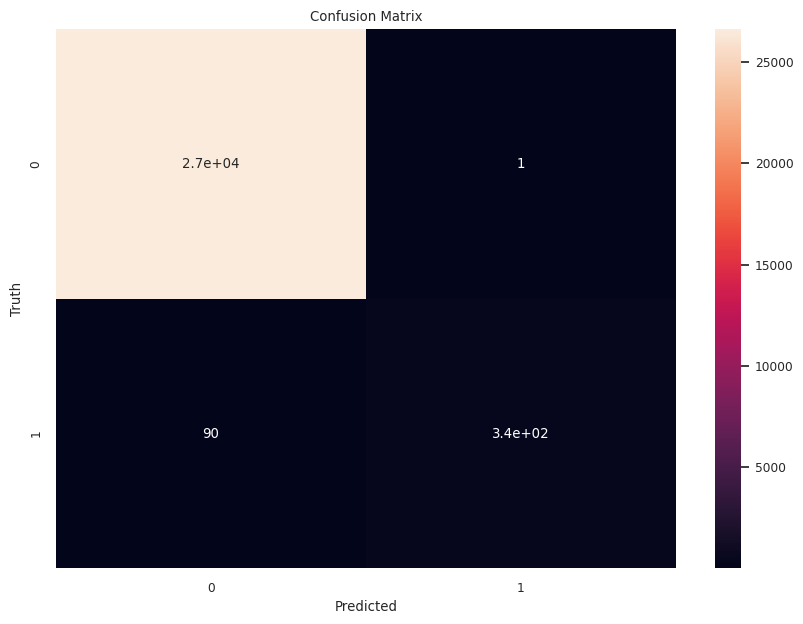

In [45]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

## 🎯 Confusion Matrix

The <b><span style='color:#FF8551'>confusion matrix</span></b> provides a visual representation of our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model's</mark></b> performance:

### 🧠 Understanding the Matrix

The confusion matrix gives us a more detailed breakdown of our model's performance:

- <b>`True Positives (TP)`</b>: These are cases in which we predicted failure (1), and the actual outcome was also failure. We have 344 TP.

- <b>`True Negatives (TN)`</b>: We predicted no failure (0), and the actual outcome was no failure. We have 26,620 TN.

- <b>`False Positives (FP)`</b>: We predicted failure, but the actual outcome was no failure. Also known as "Type I error". We have 1 FP.

- <b>`False Negatives (FN)`</b>: We predicted no failure, but the actual outcome was failure. Also known as "Type II error". We have 90 FN.

<br>

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
While the number of true positives and true negatives is quite high, indicating a good performance of our model, it's important to remember that the number of false negatives is also significant. This means that our model failed to detect 90 instances of machine failure, which could have serious implications depending on the specific context and cost associated with machine failure. Therefore, depending on the specific requirements and constraints of our project, we might want to focus on reducing the number of false negatives, even if this might increase the number of false positives.
</div>

# <span style="color:#E888BB; font-size: 1%;">ROC and Precision-Recall Curve</span>
## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>ROC Curve and AUC Score</span></b> </div>

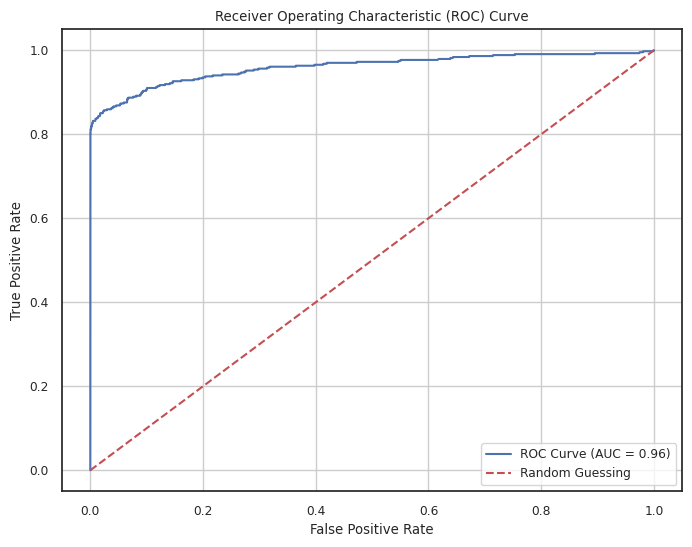

In [46]:
# Probabilities
probabilities = ada.predict_proba(X_test)
# Keep only the probabilities for class 1
prob_class_1 = probabilities[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prob_class_1)
auc_score = roc_auc_score(y_test, prob_class_1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score), color='b')
plt.plot([0, 1], [0, 1], 'k--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 📈 ROC Curve and AUC Score

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> at all classification thresholds. The Area Under the Curve (AUC) score represents the model's ability to distinguish between positive and negative classes.


And our AUC Score is: <b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">0.96</mark></b>

### 🧠 Understanding the ROC Curve and AUC Score

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The AUC score, ranging from 0 to 1, tells us how much our model is capable of distinguishing between classes. The higher the AUC, the better our model is at predicting 0s as 0s and 1s as 1s. An AUC score of 0.5 denotes a bad class separation capacity equivalent to random guessing, while an AUC score of 1 denotes an excellent class separation capacity.

> The **Area Under the Curve (AUC)** score is a single number summary of the ROC curve. An AUC score of 1 indicates a perfect model; 0.5 suggests a worthless model. Our model has an AUC score of **0.96**, indicating a high level of prediction accuracy.

<div class="warning" style="background-color: #FFDADA; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF5252; font-size: 18px; margin-top: 0; margin-bottom: 10px;">⚠️ Caution</h3>
While an AUC score of 0.96 is quite high, indicating a good performance of our model, it's important to remember that the ROC curve and AUC score are just one aspect of model evaluation. Depending on the specific requirements and constraints of our project, other metrics may be more relevant. Furthermore, the ROC curve and AUC score do not provide information about the specific threshold that should be used for classification.
</div>


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Precision-Recall Curve and Average Precision</span></b> </div>

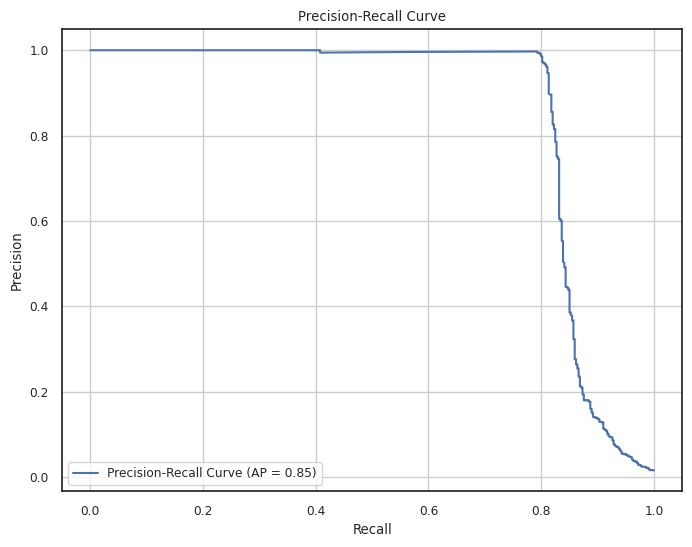

In [47]:
# Probabilities
probabilities = ada.predict_proba(X_test)
# Keep only the probabilities for class 1
prob_class_1 = probabilities[:, 1]

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, prob_class_1)
average_precision = average_precision_score(y_test, prob_class_1)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision), color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


## 📈 Precision-Recall Curve and Average Precision

The Precision-Recall curve is a graphical representation of the trade-off between precision and recall for our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> at different thresholds. The Average Precision summarizes the weighted increase in precision with each change in recall for the thresholds in the Precision-Recall curve.

And our Average Precision is: <b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">0.85</mark></b>

### 🧠 Understanding the Precision-Recall Curve and Average Precision

The Precision-Recall curve shows the trade-off between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

> **The Average Precision provides a single number that summarizes the information in the Precision-Recall curve. It is calculated as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.**

<br>

<div class="warning" style="background-color: #FFDADA; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF5252; font-size: 18px; margin-top: 0; margin-bottom: 10px;">⚠️ Caution</h3>
While an Average Precision of 0.85 is quite high, indicating a good performance of our model, it's important to remember that the Precision-Recall curve and Average Precision are just one aspect of model evaluation. Depending on the specific requirements and constraints of our project, other metrics may be more relevant.
</div>

# <span style="color:#E888BB; font-size: 1%;">Learning Curve</span>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Learning Curve</span></b> </div>

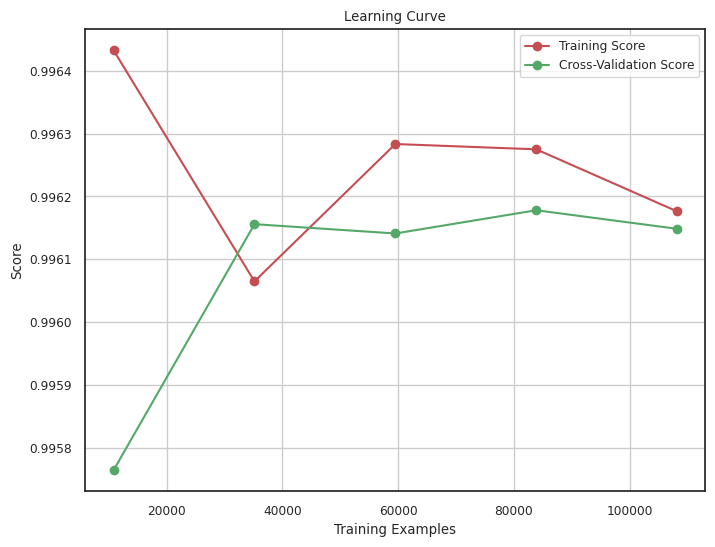

Training Size:    10821    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    35170    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    59519    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    83868    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:   108218    Training Score: 1.00    Cross-Validation Score: 1.00


In [48]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(AdaBoostClassifier(**grid.best_params_), X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.show()

# Print the training and cross-validation scores at each training size
for i, train_size in enumerate(train_sizes):
    print("Training Size: {:>8}    Training Score: {:.2f}    Cross-Validation Score: {:.2f}".format(
        train_size, train_scores_mean[i], test_scores_mean[i]))

## 📈 Learning Curve

The learning curve provides a graphical representation of the model's performance on both the training set and the validation set over a varying number of training instances. 

### 🧠 Understanding the Learning Curve

The learning curve helps us understand the trade-off between the model's performance on the training data and its ability to generalize to unseen data (represented by the cross-validation score). 

> **In our case, both the training score and the cross-validation score are consistently high across different training sizes, indicating that our model is performing well and not overfitting to the training data.**

<br>

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
While the learning curve suggests that our model is performing well, it's important to remember that this is just one aspect of model evaluation. Depending on the specific requirements and constraints of our project, other metrics and techniques may be more relevant. Furthermore, the learning curve does not provide information about the model's performance on completely independent test data
</div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Error Analysis</span></b> </div>

In [49]:
# Error Analysis
error_indices = y_test != y_pred
X_test_errors = X_test[error_indices]
y_test_errors = y_test[error_indices]
y_pred_errors = y_pred[error_indices]
error_count = len(X_test_errors)
 
print("Error Analysis:")
print("Total Errors: {}".format(error_count))

Error Analysis:
Total Errors: 91


## 🕵️‍♀️ Error Analysis

Error analysis is a critical step in the evaluation of our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b>. It allows us to understand the types of errors our model is making, which can provide insights into how the model might be improved.

After comparing the predicted values (`y_pred`) with the actual values (`y_test`), we found that our model made errors in some instances:

<b><mark style="background-color:#393939;color:white;border-radius:5px;opacity:1.0">Total Errors: 91</mark></b>

### 🧠 Understanding the Errors

These errors represent instances where our model predicted the wrong class. Analyzing these errors can help us understand where our model is struggling and provide insights into potential improvements. For example, we might find that certain features are leading our model astray, or that our model is having difficulty with certain types of instances.

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
While error analysis can provide valuable insights, it's important to remember that it is just one aspect of model evaluation. Furthermore, the errors identified are specific to the test set used, and the model may make different errors when exposed to new data. Therefore, it's crucial to use a variety of evaluation techniques and metrics to fully understand our model's performance.
</div>

# <span style="color:#E888BB; font-size: 1%;">Decision Region</span>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'>Decision Region</span></b> </div>

95.0 confidence interval 99.6% and 99.7%


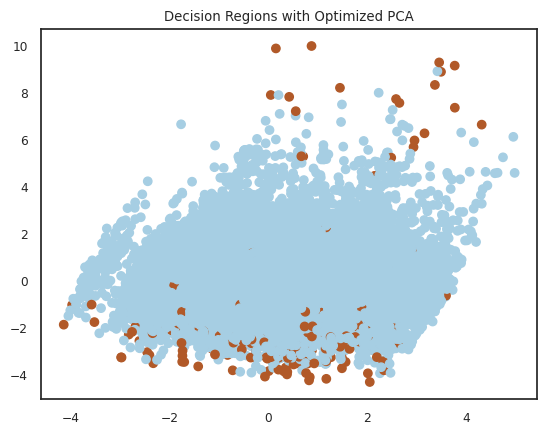

In [50]:
from sklearn.decomposition import TruncatedSVD
from joblib import Parallel, delayed

# Number of iterations for bootstrapping
n_iterations = 200

# Define the function for training and predicting with AdaBoost
def train_predict():
    sample_X, sample_y = resample(X_train, y_train)
    ada.fit(sample_X, sample_y)
    y_pred = ada.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Perform bootstrapping in parallel
n_jobs = -1  # Use all available cores, adjust if needed
accuracy_scores = Parallel(n_jobs=n_jobs)(
    delayed(train_predict)() for _ in range(n_iterations)
)

# Calculate confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(accuracy_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(accuracy_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Reduce the dimensionality of the data to 2D using TruncatedSVD (optimized PCA)
pca = TruncatedSVD(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the AdaBoost model with PCA data
ada_pca = AdaBoostClassifier()
ada_pca.fit(X_train_pca, y_train)

# Plot the decision regions
plt.figure()
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('Decision Regions with Optimized PCA')
plt.show()

## 🎯 Decision Regions and Confidence Interval

After reducing the dimensionality of our data using <b><span style='color:#FF8551'>TruncatedSVD</span></b> (an optimized form of PCA), we trained our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> on the transformed data and plotted the decision regions. 

Our model's confidence interval at 95.0% is between <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">99.6%</mark></b> and <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">99.7%</mark></b>.

### 🧠 Understanding the Decision Plot and Confidence Interval

The decision plot provides a visual representation of how our model classifies the data points in the reduced feature space. Each region corresponds to a predicted class, and the boundaries between regions represent the decision boundaries of our model.

The confidence interval gives us an estimate of the range in which we can expect the true accuracy of our model to lie, with a certain level of confidence. In our case, we can be 95% confident that the true accuracy of our model is between 99.6% and 99.7%.

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
While the decision plot and confidence interval provide valuable insights into our model's performance, it's important to remember that they are just one aspect of model evaluation. Furthermore, the decision plot is based on a reduced representation of our data, and may not capture all the complexities of the higher-dimensional feature space. Therefore, it's crucial to use a variety of evaluation techniques and metrics to fully understand our model's performance.
</div>



# <span style="color:#E888BB; font-size: 1%;">MAKING A PREDICTION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>MAKING A PREDICTION</span></b> </div>

In [51]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')

In [52]:
# Preprocess the test data
test_data = test_data.drop('Product ID', axis=1)

# Let's start by encoding the 'Type' column
test_data['Type'] = le.transform(test_data['Type'])

# Now, let's scale the numerical features
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Remove the 'id' column and store it in a separate variable
id_column = test_data['id']
test_data = test_data.drop('id', axis=1)

In [53]:
#--------------For prediction as propabilities-----------------#

# Make predictions on the test data
#probabilities = ada.predict_proba(test_data)

# Since we're interested in the probability of class 1 (Machine failure), we select the second column of probabilities
#failure_probabilities = probabilities[:, 1]

# Create a DataFrame for the final result
#final_result = pd.DataFrame({'id': id_column, 'Machine failure': failure_probabilities})

# Display the final result
#print(final_result)

#--------------For prediction as propabilities-----------------#

In [54]:
# Make predictions on the test data
predictions = ada.predict(test_data)

# Create a DataFrame for the final result
submission = pd.DataFrame({'id': id_column, 'Machine failure': predictions})

# Display the final result
print(submission)

           id  Machine failure
0      136429                0
1      136430                0
2      136431                0
3      136432                0
4      136433                0
...       ...              ...
90949  227378                0
90950  227379                0
90951  227380                0
90952  227381                0
90953  227382                0

[90954 rows x 2 columns]


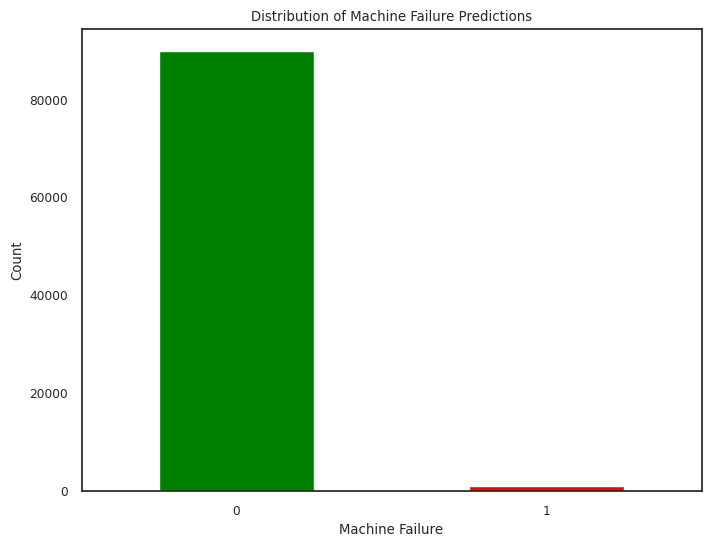

In [59]:


colors = ['green', 'red']  # Specify the colors for each bar

plt.figure(figsize=(8, 6))
submission['Machine failure'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Machine Failure Predictions')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



# <span style="color:#E888BB; font-size: 1%;">SUMMARY</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>SUMMARY</span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 📚 Summary</span></b> </div>

Throughout this project, we have undertaken a comprehensive process to understand the machine failure dataset and build a predictive model. 

### 📊 Exploratory Data Analysis (EDA)

Our EDA provided several key insights into the dataset. We observed the central tendencies and variability of various **`Features`** such as air temperature, process temperature, rotational speed, torque, and tool wear time. We also examined the different types of machine failures.

The correlation coefficients indicated strong positive correlations between `Heat Dissipation Failure (HDF)`, `Overstrain Failure (OSF)`, `Power Failure (PWF)`, and machine failure, suggesting that these failures often occur together. Torque also had a positive correlation, indicating that higher torque might increase the likelihood of machine failure.

The visualizations revealed the distributions of the features and their relationships with machine failure. The Elbow Method plot suggested that the optimal number of clusters for the data is around 4.

### 🎯 Hyperparameter Tuning and Cross-Validation

We started with hyperparameter tuning and cross-validation. The best parameters found were a learning rate of 0.3 and 200 estimators. The cross-validation scores were consistently high, with an average of 0.996, indicating that our model is expected to perform well on unseen data.

### 📈 Model Performance Metrics

Our <b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> achieved high performance across a range of metrics. The model accuracy on the test set was 0.997. The AUC score was 0.96, indicating a strong ability to distinguish between positive and negative classes.

<br>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://xmple.com/wallpaper/streaks-stripes-cyan-lines-2560x1800-c3-74a3a8-9bcdd2-cfedf0-l3-50-100-200-a-105-f-1.svg)"><b><span style='color:black'> 💡 Discussion</span></b> </div>

The high performance of our model suggests that it has effectively learned to predict machine failures based on the provided features. However, the model made a total of 91 errors on the test set, suggesting that there may be room for further improvement. Future work could involve a more detailed analysis of these errors to gain insights into the types of instances that the model struggles with and to identify potential improvements.

Despite the high AUC score of 0.96, indicating a strong ability to distinguish between positive and negative classes, it's important to remember that these results are specific to the data we used for training and testing. The model's performance could vary when applied to new data. Therefore, it's crucial to continually evaluate and update the model as new data becomes available.

Furthermore, while the learning curve suggested that our model is not overfitting to the training data, it's important to remember that this is just one aspect of model evaluation. Depending on the specific requirements and constraints of our project, other metrics and techniques may be more relevant.

<br>

<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4614200/pexels-photo-4614200.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>SUGGESTION</span></b> </div>

<br>

<b><mark style="background-color:#FF8551;color:white;border-radius:5px;opacity:1.0">AdaBoost model</mark></b> has shown promising results in predicting machine failures. However, there's always room for improvement. Here are some suggestions for future work
    
1. **Error Analysis**: Our model made a total of 91 errors on the test set. A more detailed analysis of these errors could provide insights into the types of instances that the model struggles with, which could guide improvements to the model.

2. **Model Selection**: While the AdaBoost model performed well, other models could potentially achieve better results. Future work could involve testing different types of models, such as Random Forest or Gradient Boosting, to see if they offer any performance improvements.

3. **Feature Engineering**: The current model uses the features as they are provided in the dataset. However, creating new features or transforming existing ones could potentially improve the model's performance. For example, features could be normalized or scaled, or new features could be created by combining existing ones in meaningful ways.

4. **Hyperparameter Tuning**: We found the best parameters for our AdaBoost model to be a learning rate of 0.3 and 200 estimators. However, there may be other combinations of parameters that could improve the model's performance. Future work could involve a more extensive grid search or other hyperparameter optimization techniques.

5. **Model Evaluation**: While our model achieved a high AUC score, other metrics could be relevant depending on the specific requirements and constraints of the project. Future work could involve evaluating the model using different metrics, such as precision, recall, or F1 score.

6. **Data Collection**: Our model's performance could potentially be improved with more data. If possible, collecting more data on machine failures could help the model learn more patterns and make more accurate predictions.

<br>

<div class="warning" style="background-color: #FAF0E4; border-left: 6px solid #FF5252;font-size: 100%; padding: 10px;">
<h3 style="color: #FF8551; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🗒️  Keep in Mind </h3>
Remember, the goal is to build a model that not only performs well on our current data, but also generalizes well to new, unseen data. Therefore, it's crucial to continually evaluate and update the model as new data becomes available.
</div>




<br>

***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>






